In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
uscon_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/GitHub_ToChair/FilteredDataSetForExp_001.csv')

In [28]:
uscon_df.shape

(325420, 2)

In [29]:
uscon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325420 entries, 0 to 325419
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   consumer_complaint_narrative  325420 non-null  object
 1   hierarchical_label            325420 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


In [31]:
uscon_df.head()

consumer_complaint_narrative  \
0  I was using Bread XXXX previously known as XXX...   
1  XXXX XXXX XXXX were presented by the XXXX hold...   
2  Complaint against NexBank This bank and its em...   
3  Chase Bank 9 month lock on a CD at 5 % equals ...   
4  Since XXXX of XX/XX/2024, Synchrony bank has b...   

                        hierarchical_label  
0  CheckingSavings::cdCertificateOfDeposit  
1  CheckingSavings::cdCertificateOfDeposit  
2  CheckingSavings::cdCertificateOfDeposit  
3  CheckingSavings::cdCertificateOfDeposit  
4  CheckingSavings::cdCertificateOfDeposit

## Bar chart of sub-products within each product

### Subtask:
Generate a single faceted bar chart showing the frequency distribution of 'sub-product' for each 'product' category.

**Reasoning**:
To effectively visualize the frequency of sub-products within each product category in a single graph, a `seaborn.catplot` with `col='product'` is ideal. This creates multiple subplots, one for each product, allowing for clear display and comparison of sub-product frequencies. I will first group the DataFrame by 'product' and 'sub-product' to count occurrences, and then sort these counts to improve readability. Setting `sharey=False` ensures that each subplot has an appropriate y-axis scale, and `col_wrap` will arrange the plots neatly. `plt.suptitle` and `plt.tight_layout` will enhance the overall presentation.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product-subproduct combination
product_subproduct_counts = uscon_df.groupby(['product', 'sub-product']).size().reset_index(name='count')

# Sort by count within each product for better visualization
product_subproduct_counts_sorted = product_subproduct_counts.sort_values(by=['product', 'count'], ascending=[True, False])

# Create the faceted bar chart
g = sns.catplot(data=product_subproduct_counts_sorted,
                x='sub-product',
                y='count',
                col='product',
                col_wrap=3, # Wrap columns after 3 plots
                kind='bar',
                height=4,
                aspect=1.5,
                sharey=False, # Allow each subplot to have its own y-axis scale
                palette='viridis')

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90, ha='right')

# Set titles for each subplot
g.set_titles("{col_name}")

# Adjust layout to prevent overlapping titles/labels
g.tight_layout()

# Add a main title for the entire figure
plt.suptitle('Frequency of Sub-Products within Each Product Category', y=1.02, fontsize=16)

plt.show()
print("Faceted bar chart showing the frequency of sub-products within each product category generated.")

# Task
Analyze the `uscon_df` DataFrame by splitting the 'hierarchical_label' column into 'product' and 'sub-product' columns, displaying unique values for these new columns, and then generating two bar charts for 'product' frequency: one with a linear y-axis and another with a logarithmic y-axis.

## Split hierarchical_label

### Subtask:
Split the 'hierarchical_label' column into 'product' and 'sub-product' based on the '::' delimiter and create new columns in the DataFrame.


**Reasoning**:
To split the 'hierarchical_label' column into 'product' and 'sub-product', I will use the `str.split('::', expand=True)` method and assign the resulting two columns to the DataFrame.



In [32]:
uscon_df[['product', 'sub-product']] = uscon_df['hierarchical_label'].str.split('::', expand=True)
print("Added 'product' and 'sub-product' columns to the DataFrame.")

Added 'product' and 'sub-product' columns to the DataFrame.


In [33]:
uscon_df.head()

consumer_complaint_narrative  \
0  I was using Bread XXXX previously known as XXX...   
1  XXXX XXXX XXXX were presented by the XXXX hold...   
2  Complaint against NexBank This bank and its em...   
3  Chase Bank 9 month lock on a CD at 5 % equals ...   
4  Since XXXX of XX/XX/2024, Synchrony bank has b...   

                        hierarchical_label          product  \
0  CheckingSavings::cdCertificateOfDeposit  CheckingSavings   
1  CheckingSavings::cdCertificateOfDeposit  CheckingSavings   
2  CheckingSavings::cdCertificateOfDeposit  CheckingSavings   
3  CheckingSavings::cdCertificateOfDeposit  CheckingSavings   
4  CheckingSavings::cdCertificateOfDeposit  CheckingSavings   

              sub-product  
0  cdCertificateOfDeposit  
1  cdCertificateOfDeposit  
2  cdCertificateOfDeposit  
3  cdCertificateOfDeposit  
4  cdCertificateOfDeposit

## Display unique products and sub-products

### Subtask:
Display the unique values for the newly created 'product' and 'sub-product' columns.


**Reasoning**:
To display the unique values for the 'product' and 'sub-product' columns, I will use the `.unique()` method on each column and print the results.



In [ ]:
print("Unique products:")
print(uscon_df['product'].unique())
print("\nUnique sub-products:")
print(uscon_df['sub-product'].unique())

Unique products:
['CheckingSavings' 'CreditCard' 'CreditPrepaidCard' 'CreditReporting'
 'CreditReportingRepair' 'DebtCollection' 'DebtManagement' 'MoneyTransfer'
 'Mortgage' 'PaydayLoan' 'PrepaidCard' 'StudentLoan' 'VehicleLoanLease']

Unique sub-products:
['cdCertificateOfDeposit' 'checkingAccount' 'otherBankingProductOrService'
 'savingsAccount' 'general-purposeCreditCardOrChargeCard'
 'storeCreditCard' 'creditReporting' 'otherPersonalConsumerReport'
 'autoDebt' 'creditCardDebt' 'federalStudentLoanDebt' 'iDoNotKnow'
 'medicalDebt' 'mortgageDebt' 'otherDebt' 'paydayLoanDebt'
 'privateStudentLoanDebt' 'rentalDebt' 'telecommunicationsDebt'
 'creditRepairServices' 'debtSettlement'
 'mortgageModificationOrForeclosureAvoidance' 'checkCashingService'
 'domesticUsMoneyTransfer' 'foreignCurrencyExchange'
 'internationalMoneyTransfer' 'mobileOrDigitalWallet'
 'moneyOrderTravelersCheckOrCashiersCheck' 'virtualCurrency'
 'conventionalHomeMortgage' 'fhaMortgage'
 'homeEquityLoanOrLineOfCreditHelo

## Create bar chart of products

### Subtask:
Generate a bar chart showing the frequency distribution of the 'product' column.


**Reasoning**:
To visualize the frequency distribution, I need to import the necessary plotting libraries, calculate the value counts of the 'product' column, and then create a bar chart with appropriate labels and title.



/tmp/ipython-input-1665984291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')


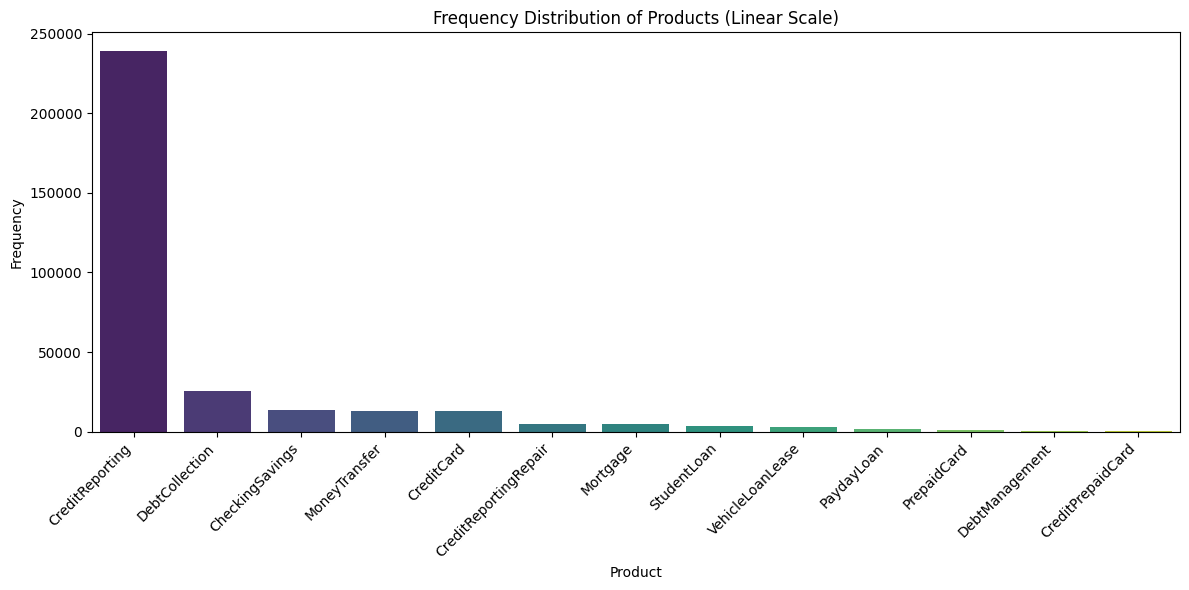

Bar chart showing the frequency distribution of products generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product
product_counts = uscon_df['product'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Products (Linear Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart showing the frequency distribution of products generated.")

**Reasoning**:
The previous code generated a FutureWarning about the `palette` argument in `sns.barplot`. I will modify the existing `sns.barplot` call to explicitly set `hue=product_counts.index` and `legend=False` to resolve this warning and ensure the plot is generated correctly. Then, I will create a new code cell to generate a second bar chart of the 'product' frequency, but with a logarithmic y-axis, to better visualize distributions with large discrepancies in counts.



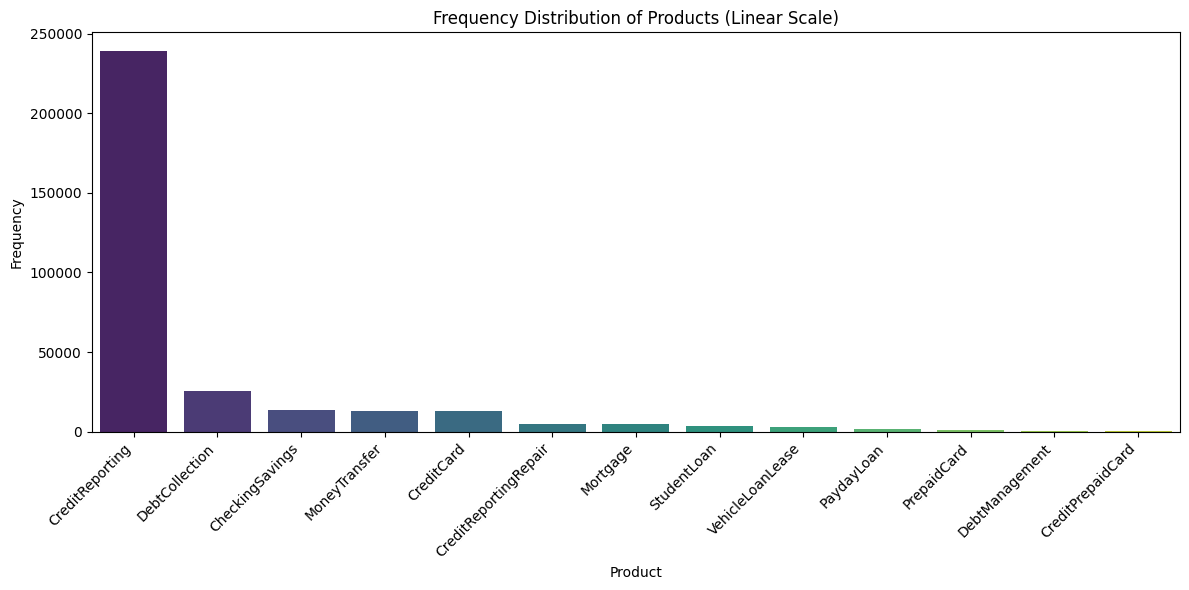

Bar chart showing the frequency distribution of products (linear scale) generated.


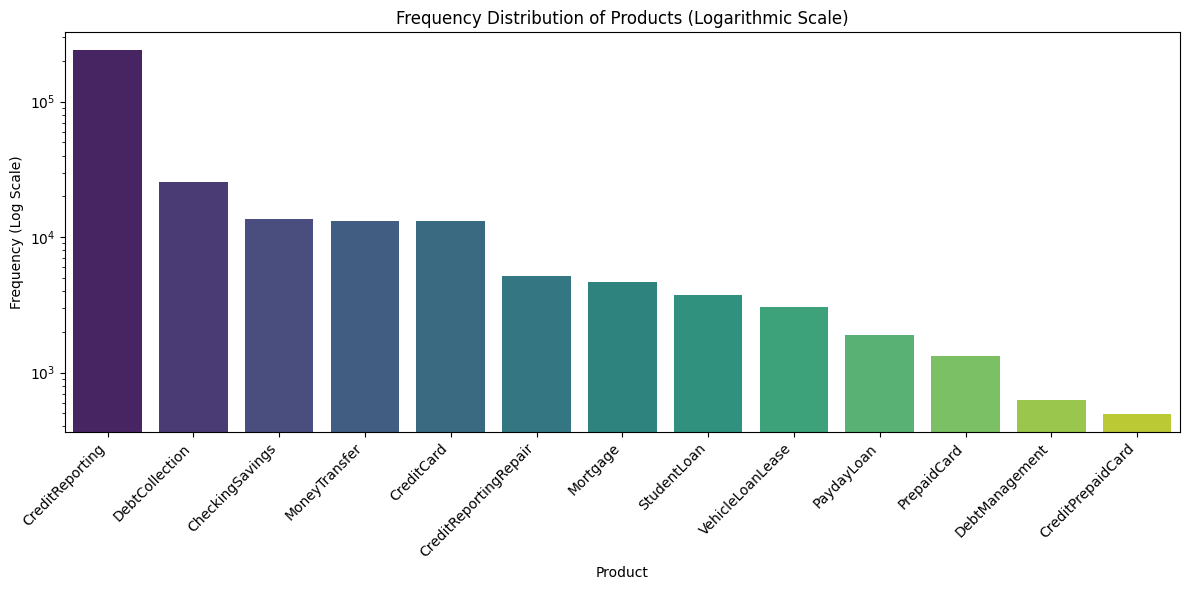

Bar chart showing the frequency distribution of products (logarithmic scale) generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product
product_counts = uscon_df['product'].value_counts()

# Create the bar chart with linear y-axis
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, hue=product_counts.index, palette='viridis', legend=False)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Products (Linear Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart showing the frequency distribution of products (linear scale) generated.")

# Create the bar chart with logarithmic y-axis
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, hue=product_counts.index, palette='viridis', legend=False)
plt.xlabel('Product')
plt.ylabel('Frequency (Log Scale)')
plt.title('Frequency Distribution of Products (Logarithmic Scale)')
plt.yscale('log') # Set y-axis to logarithmic scale
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart showing the frequency distribution of products (logarithmic scale) generated.")

## Create a pie chart of product distribution

### Subtask:
Generate a pie chart showing the proportion of each 'product' category.

**Reasoning**:
To visualize the proportion of each product, I will use `value_counts()` to get the frequencies and then `plt.pie()` to create the pie chart. `autopct='%1.1f%%'` will display the percentage on each slice, and `startangle=90` will rotate the starting point for better visualization.

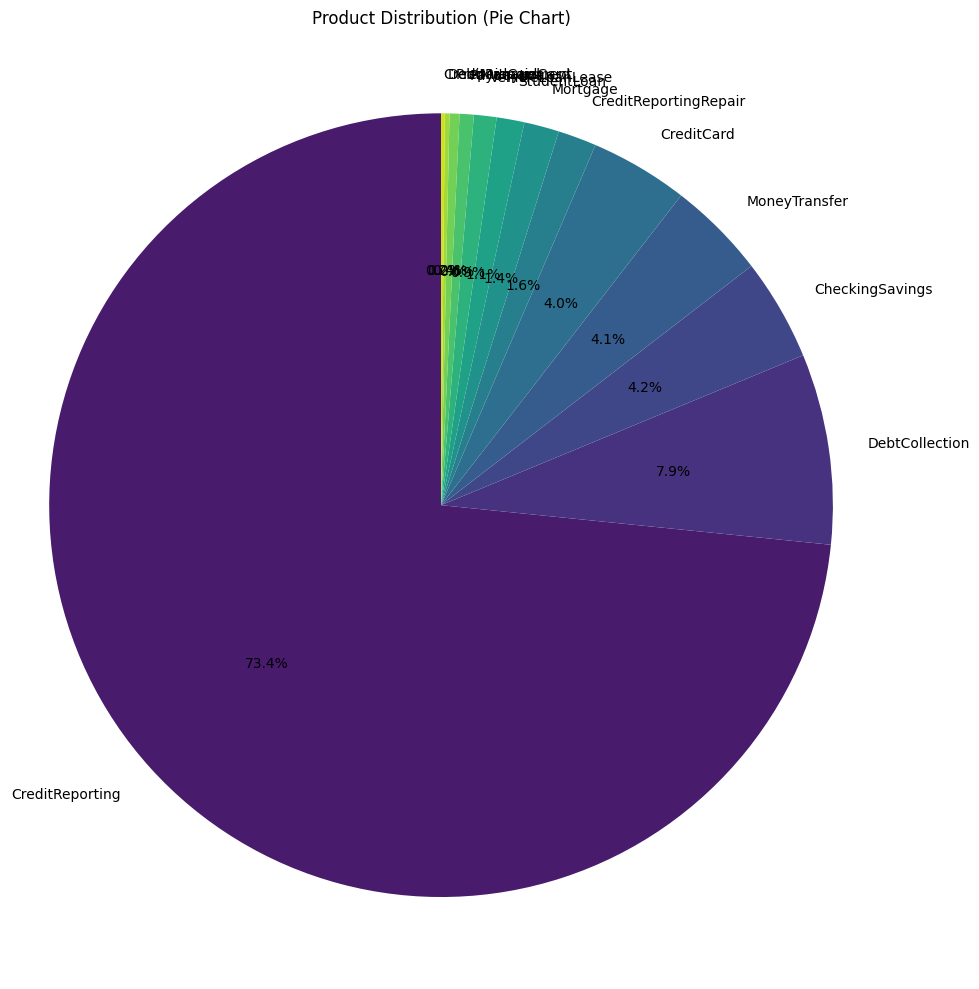

Pie chart showing the product distribution generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product
product_counts = uscon_df['product'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(product_counts)))
plt.title('Product Distribution (Pie Chart)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
print("Pie chart showing the product distribution generated.")

## Summary:

### Data Analysis Key Findings

*   The 'hierarchical\_label' column was successfully split into 'product' and 'sub-product' columns.
*   There are 13 unique product categories, including 'CheckingSavings', 'CreditCard', 'Mortgage', 'StudentLoan', and 'VehicleLoanLease'.
*   There are 48 unique sub-product categories, providing a more granular classification than the main product categories.
*   Two bar charts were successfully generated showing the frequency distribution of products: one with a linear y-axis and another with a logarithmic y-axis, allowing for better visualization of potentially skewed distributions.

### Insights or Next Steps

*   The significant difference in the number of unique values between 'product' (13) and 'sub-product' (48) suggests a deep, hierarchical categorization within the dataset, indicating that 'sub-product' offers much finer detail.
*   Analyzing the frequency distributions on both linear and logarithmic scales is crucial, as it implies a skewed distribution where a few products might dominate the dataset, warranting further investigation into these high-frequency categories or potential outliers.


/tmp/ipython-input-3055805512.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=product_subproduct_counts_sorted,


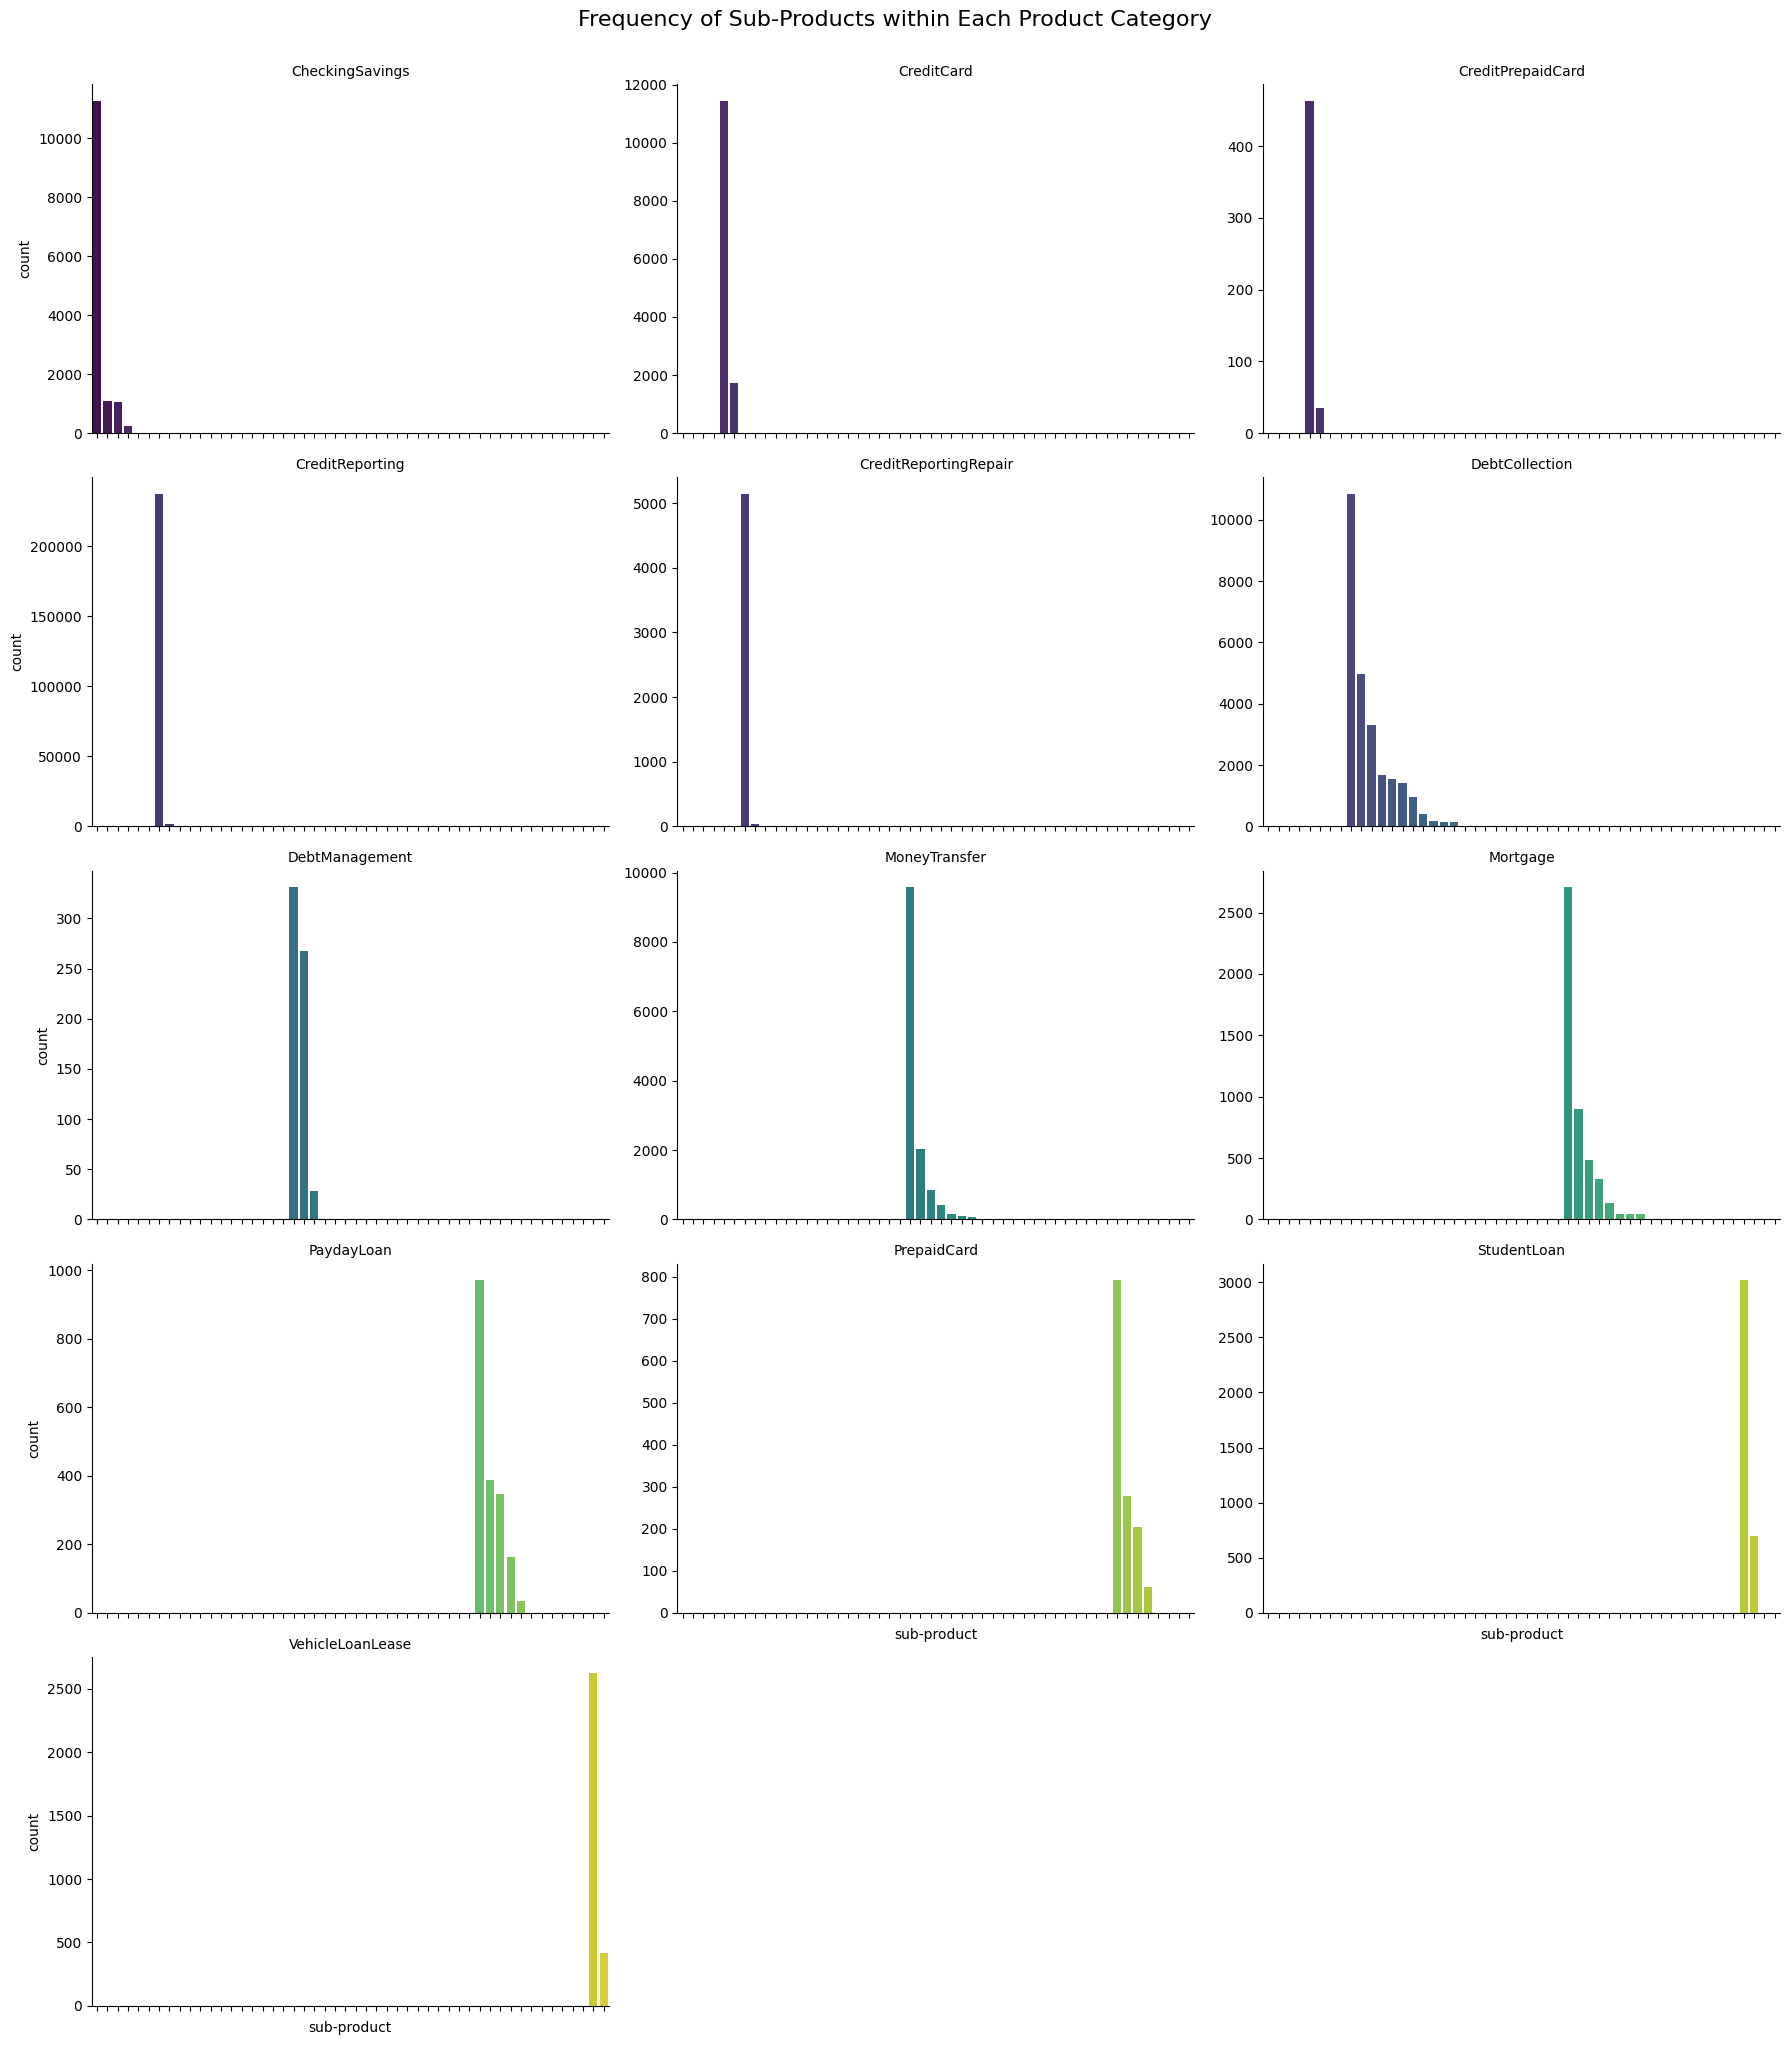

Faceted bar chart showing the frequency of sub-products within each product category generated.


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product-subproduct combination
product_subproduct_counts = uscon_df.groupby(['product', 'sub-product']).size().reset_index(name='count')

# Sort by count within each product for better visualization
product_subproduct_counts_sorted = product_subproduct_counts.sort_values(by=['product', 'count'], ascending=[True, False])

# Create the faceted bar chart
g = sns.catplot(data=product_subproduct_counts_sorted,
                x='sub-product',
                y='count',
                col='product',
                col_wrap=3, # Wrap columns after 3 plots
                kind='bar',
                height=4,
                aspect=1.5,
                sharey=False, # Allow each subplot to have its own y-axis scale
                palette='viridis')

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90, ha='right')

# Set titles for each subplot
g.set_titles("{col_name}")

# Adjust layout to prevent overlapping titles/labels
g.tight_layout()

# Add a main title for the entire figure
plt.suptitle('Frequency of Sub-Products within Each Product Category', y=1.02, fontsize=16)

plt.show()
print("Faceted bar chart showing the frequency of sub-products within each product category generated.")

## Bar chart of sub-products within each product

### Subtask:
Generate a single faceted bar chart showing the frequency distribution of 'sub-product' for each 'product' category.

**Reasoning**:
To effectively visualize the frequency of sub-products within each product category in a single graph, a `seaborn.catplot` with `col='product'` is ideal. This creates multiple subplots, one for each product, allowing for clear display and comparison of sub-product frequencies. I will first group the DataFrame by 'product' and 'sub-product' to count occurrences, and then sort these counts to improve readability. Setting `sharey=False` ensures that each subplot has an appropriate y-axis scale, and `col_wrap` will arrange the plots neatly. `plt.suptitle` and `plt.tight_layout` will enhance the overall presentation.

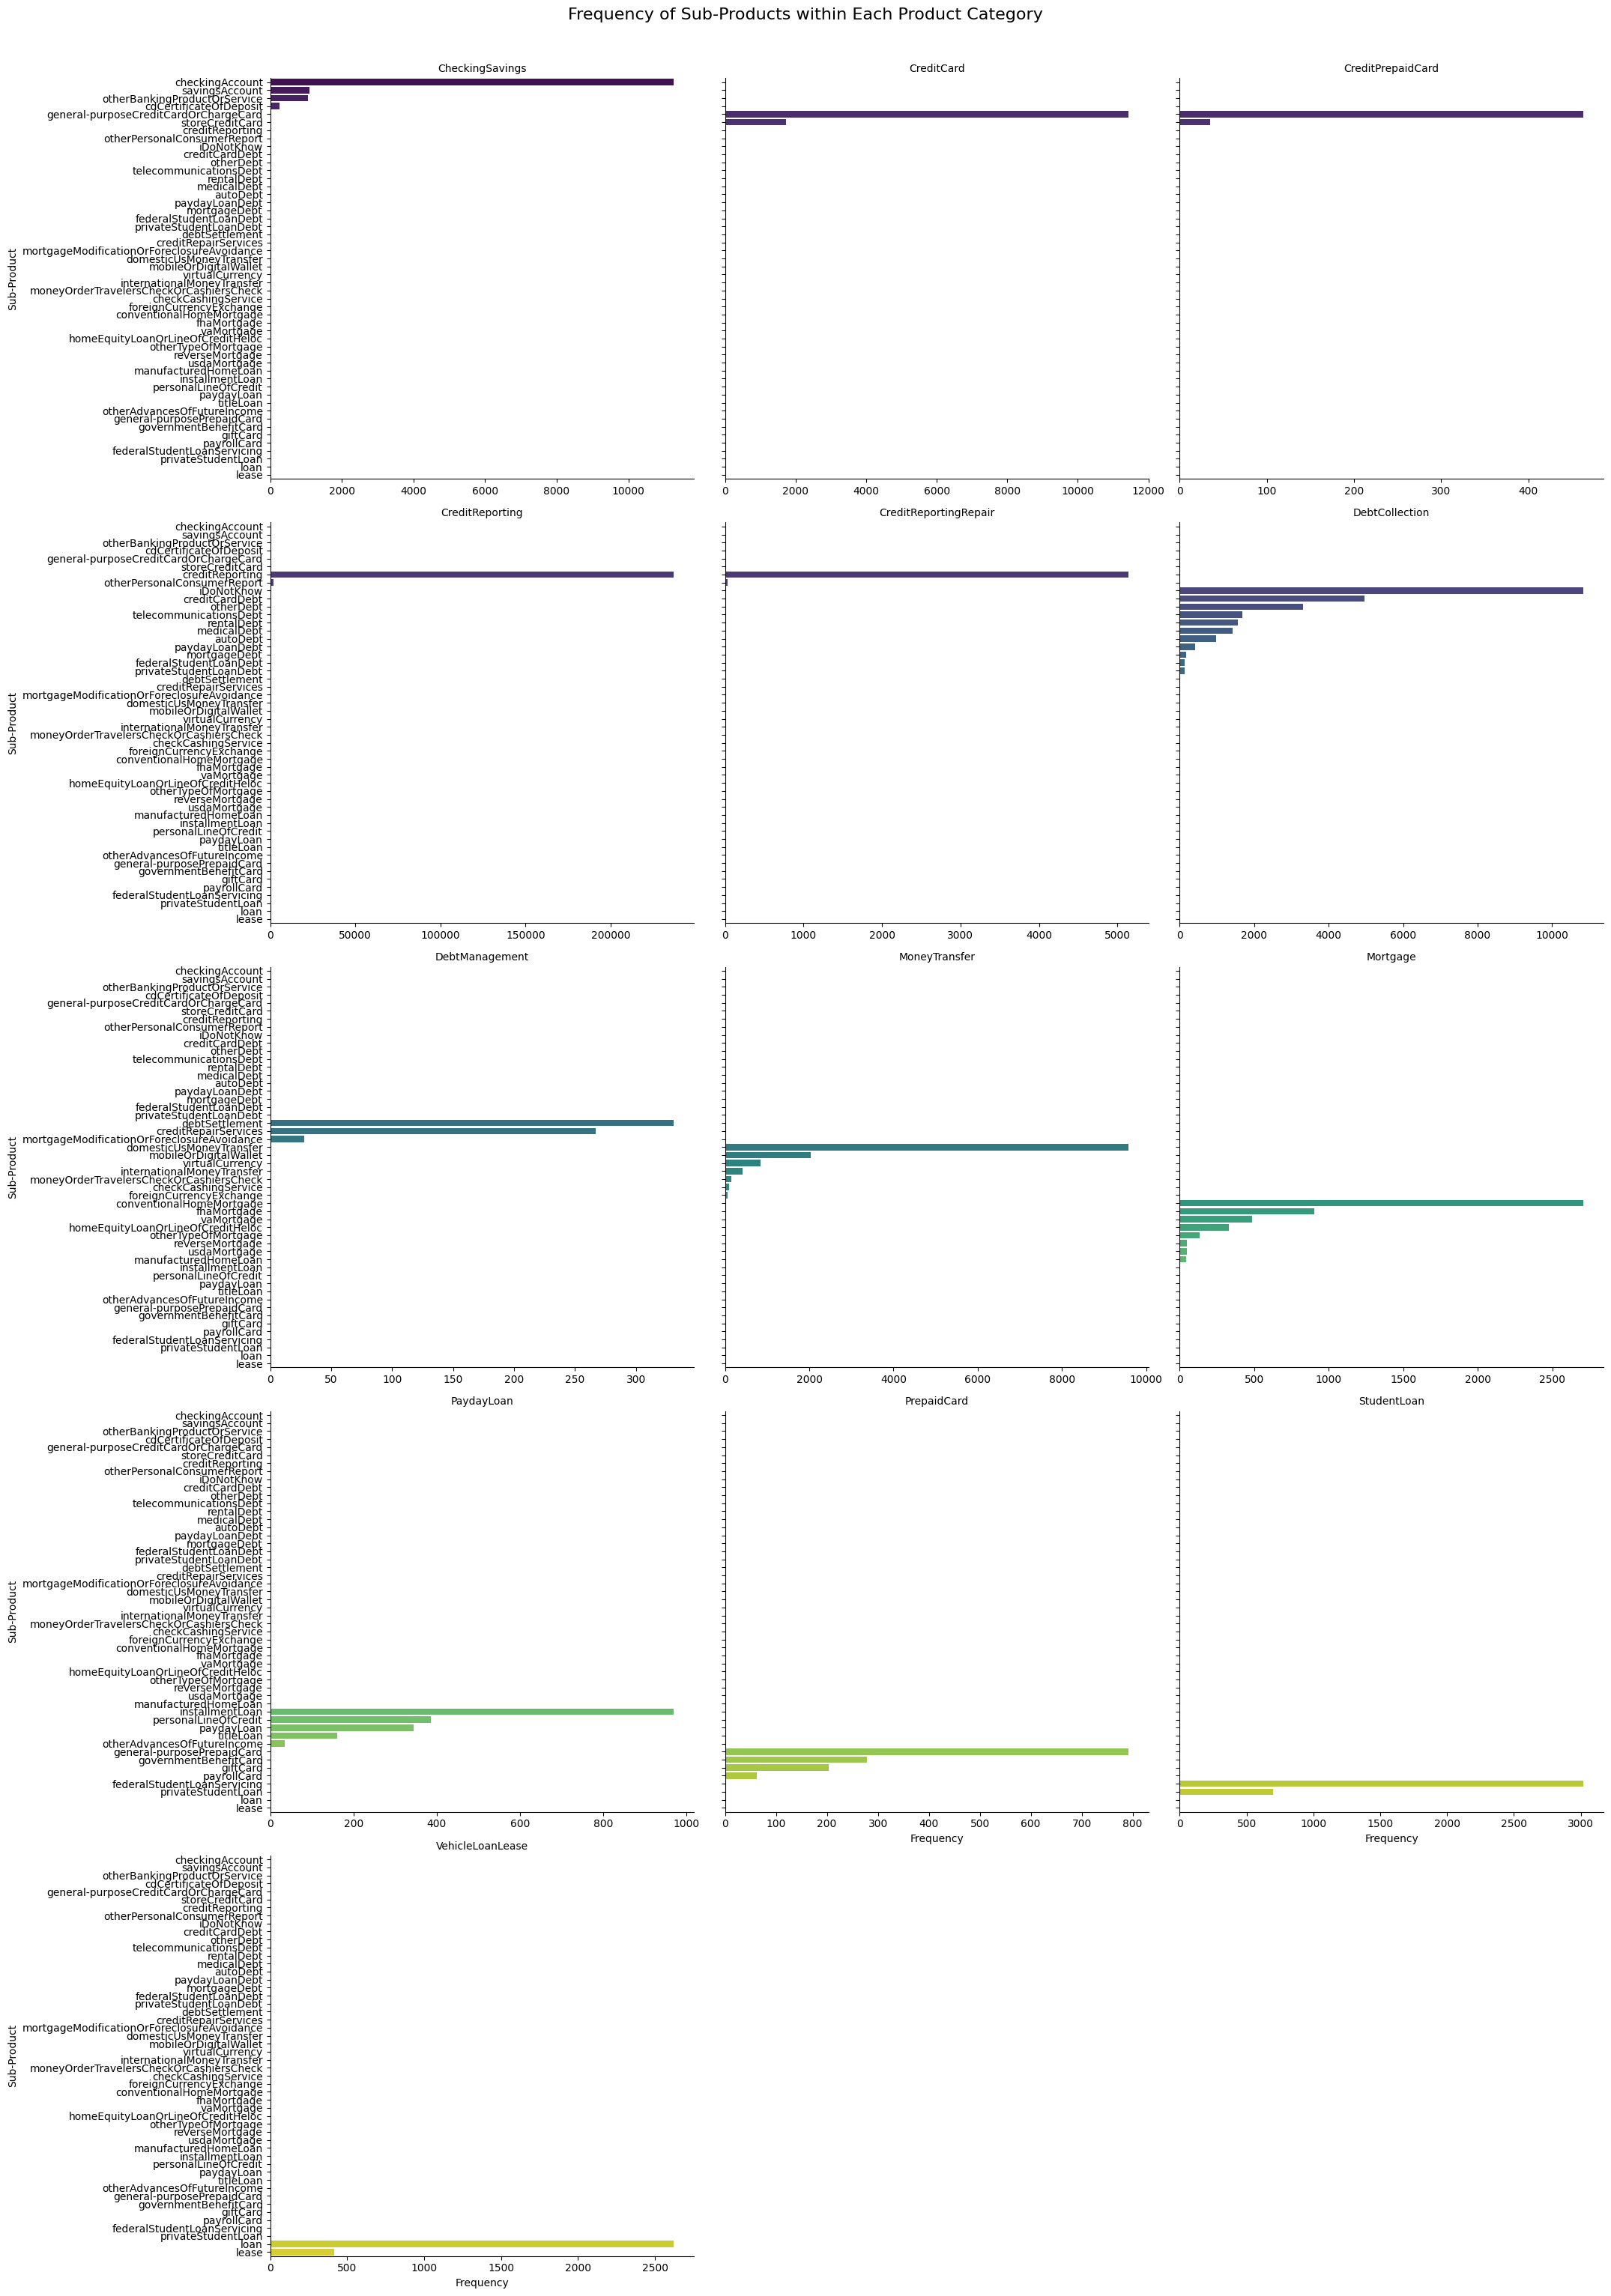

Faceted horizontal bar chart showing the frequency of sub-products within each product category generated.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product-subproduct combination
product_subproduct_counts = uscon_df.groupby(['product', 'sub-product']).size().reset_index(name='count')

# Sort by count within each product for better visualization
product_subproduct_counts_sorted = product_subproduct_counts.sort_values(by=['product', 'count'], ascending=[True, False])

# Create the faceted horizontal bar chart
g = sns.catplot(data=product_subproduct_counts_sorted,
                x='count', # Swapped x and y for horizontal bars
                y='sub-product', # Swapped x and y for horizontal bars
                col='product',
                col_wrap=3, # Wrap columns after 3 plots
                kind='bar',
                height=6, # Adjusted height for horizontal bars
                aspect=1.2, # Adjusted aspect for horizontal bars
                sharex=False, # Allow each subplot to have its own x-axis scale
                hue='sub-product', # Assign 'sub-product' to hue to resolve FutureWarning
                palette='viridis',
                legend=False) # Set legend to False as hue is for color mapping here

# Set labels for the axes
g.set_axis_labels('Frequency', 'Sub-Product')

# Set titles for each subplot
g.set_titles("{col_name}")

# Adjust layout to prevent overlapping titles/labels
g.tight_layout()

# Add a main title for the entire figure
plt.suptitle('Frequency of Sub-Products within Each Product Category', y=1.02, fontsize=16)

plt.show()
print("Faceted horizontal bar chart showing the frequency of sub-products within each product category generated.")

## Faceted Horizontal Bar Chart of Sub-Products with Logarithmic Scale

### Subtask:
Generate a single faceted horizontal bar chart showing the frequency distribution of 'sub-product' for each 'product' category, with the frequency (x-axis) on a logarithmic scale.

**Reasoning**:
To effectively visualize the frequency of sub-products within each product category on a logarithmic scale, a `seaborn.catplot` with `col='product'` is ideal. Swapping `x` and `y` will create horizontal bars, and then applying `g.set(xscale='log')` will set the x-axis to a logarithmic scale. This helps in cases where there's a large disparity in frequencies. I will group the DataFrame by 'product' and 'sub-product' to count occurrences, and then sort these counts to improve readability. Setting `sharex=False` ensures that each subplot has an appropriate x-axis scale. `col_wrap`, `plt.suptitle`, and `plt.tight_layout` will enhance the overall presentation.

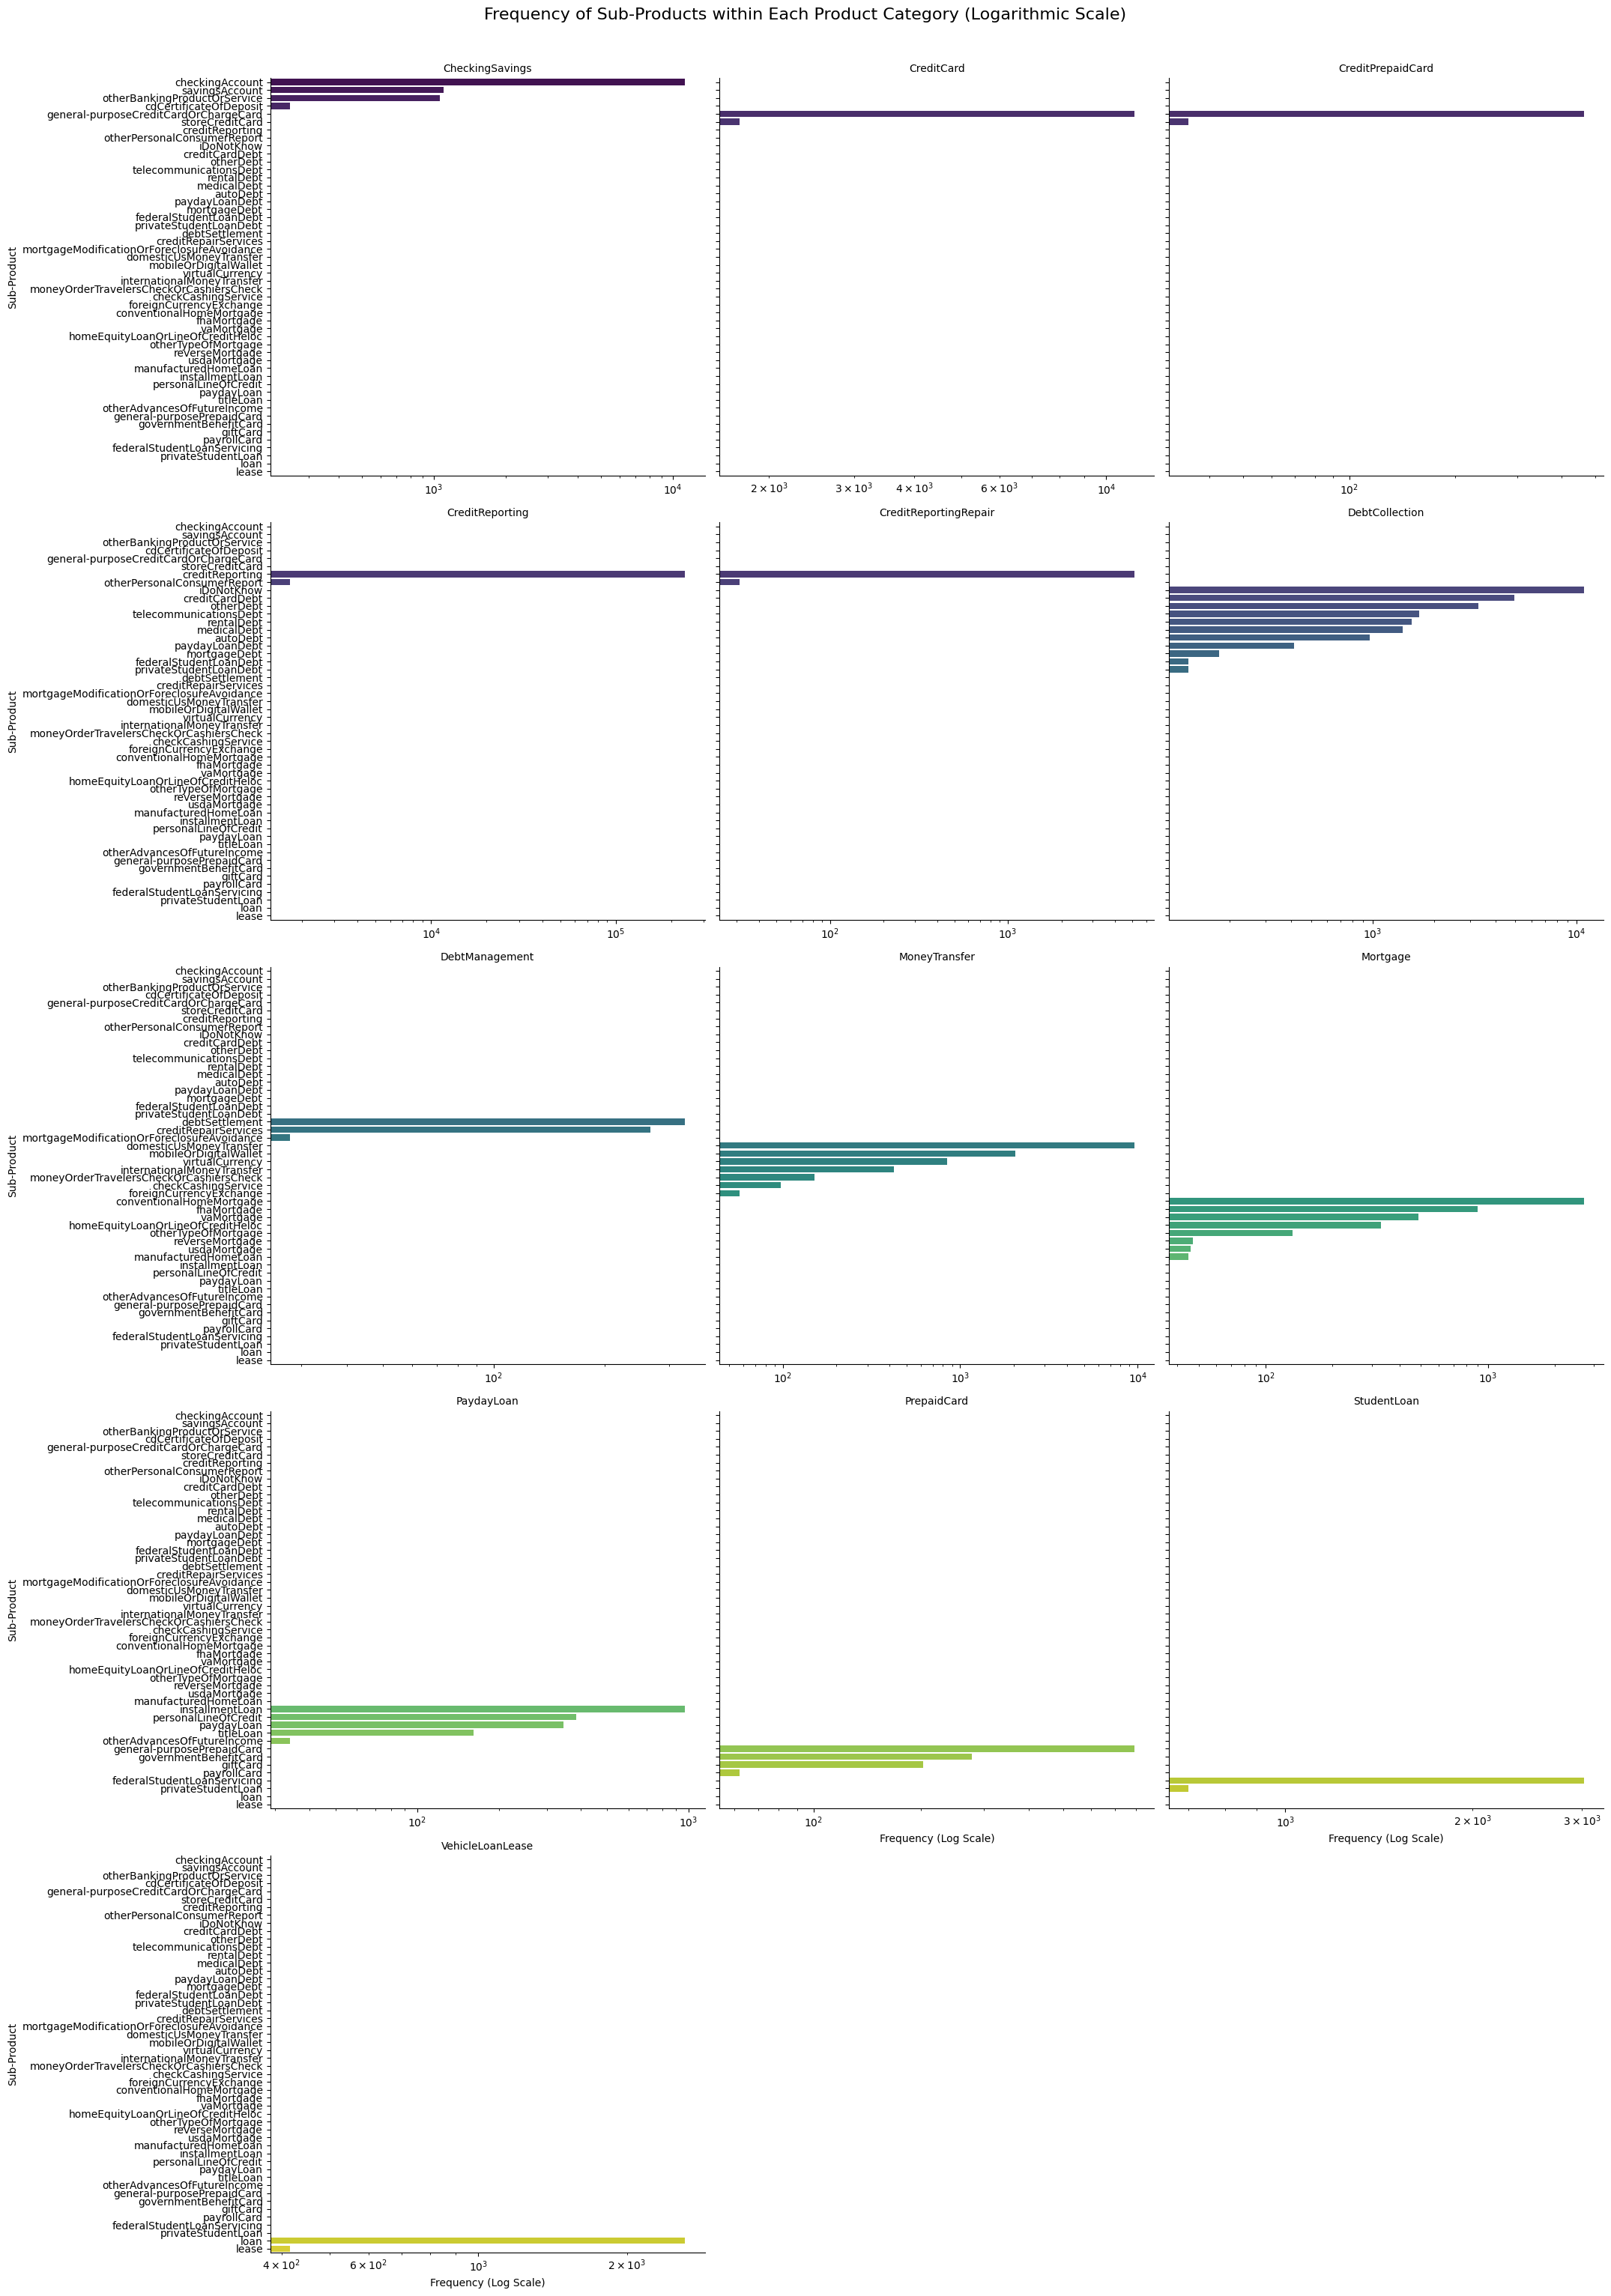

Faceted horizontal bar chart of sub-products with logarithmic x-axis generated.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product-subproduct combination
product_subproduct_counts = uscon_df.groupby(['product', 'sub-product']).size().reset_index(name='count')

# Sort by count within each product for better visualization
product_subproduct_counts_sorted = product_subproduct_counts.sort_values(by=['product', 'count'], ascending=[True, False])

# Create the faceted horizontal bar chart with logarithmic x-axis
g = sns.catplot(data=product_subproduct_counts_sorted,
                x='count', # Frequency on x-axis
                y='sub-product', # Sub-product names on y-axis
                col='product',
                col_wrap=3, # Wrap columns after 3 plots
                kind='bar',
                height=6, # Adjusted height for horizontal bars
                aspect=1.2, # Adjusted aspect for horizontal bars
                sharex=False, # Allow each subplot to have its own x-axis scale
                hue='sub-product', # Assign 'sub-product' to hue for color mapping
                palette='viridis',
                legend=False) # Set legend to False

# Apply logarithmic scale to the x-axis for each subplot
g.set(xscale="log")

# Set labels for the axes
g.set_axis_labels('Frequency (Log Scale)', 'Sub-Product')

# Set titles for each subplot
g.set_titles("{col_name}")

# Adjust layout to prevent overlapping titles/labels
g.tight_layout()

# Add a main title for the entire figure
plt.suptitle('Frequency of Sub-Products within Each Product Category (Logarithmic Scale)', y=1.02, fontsize=16)

plt.show()
print("Faceted horizontal bar chart of sub-products with logarithmic x-axis generated.")

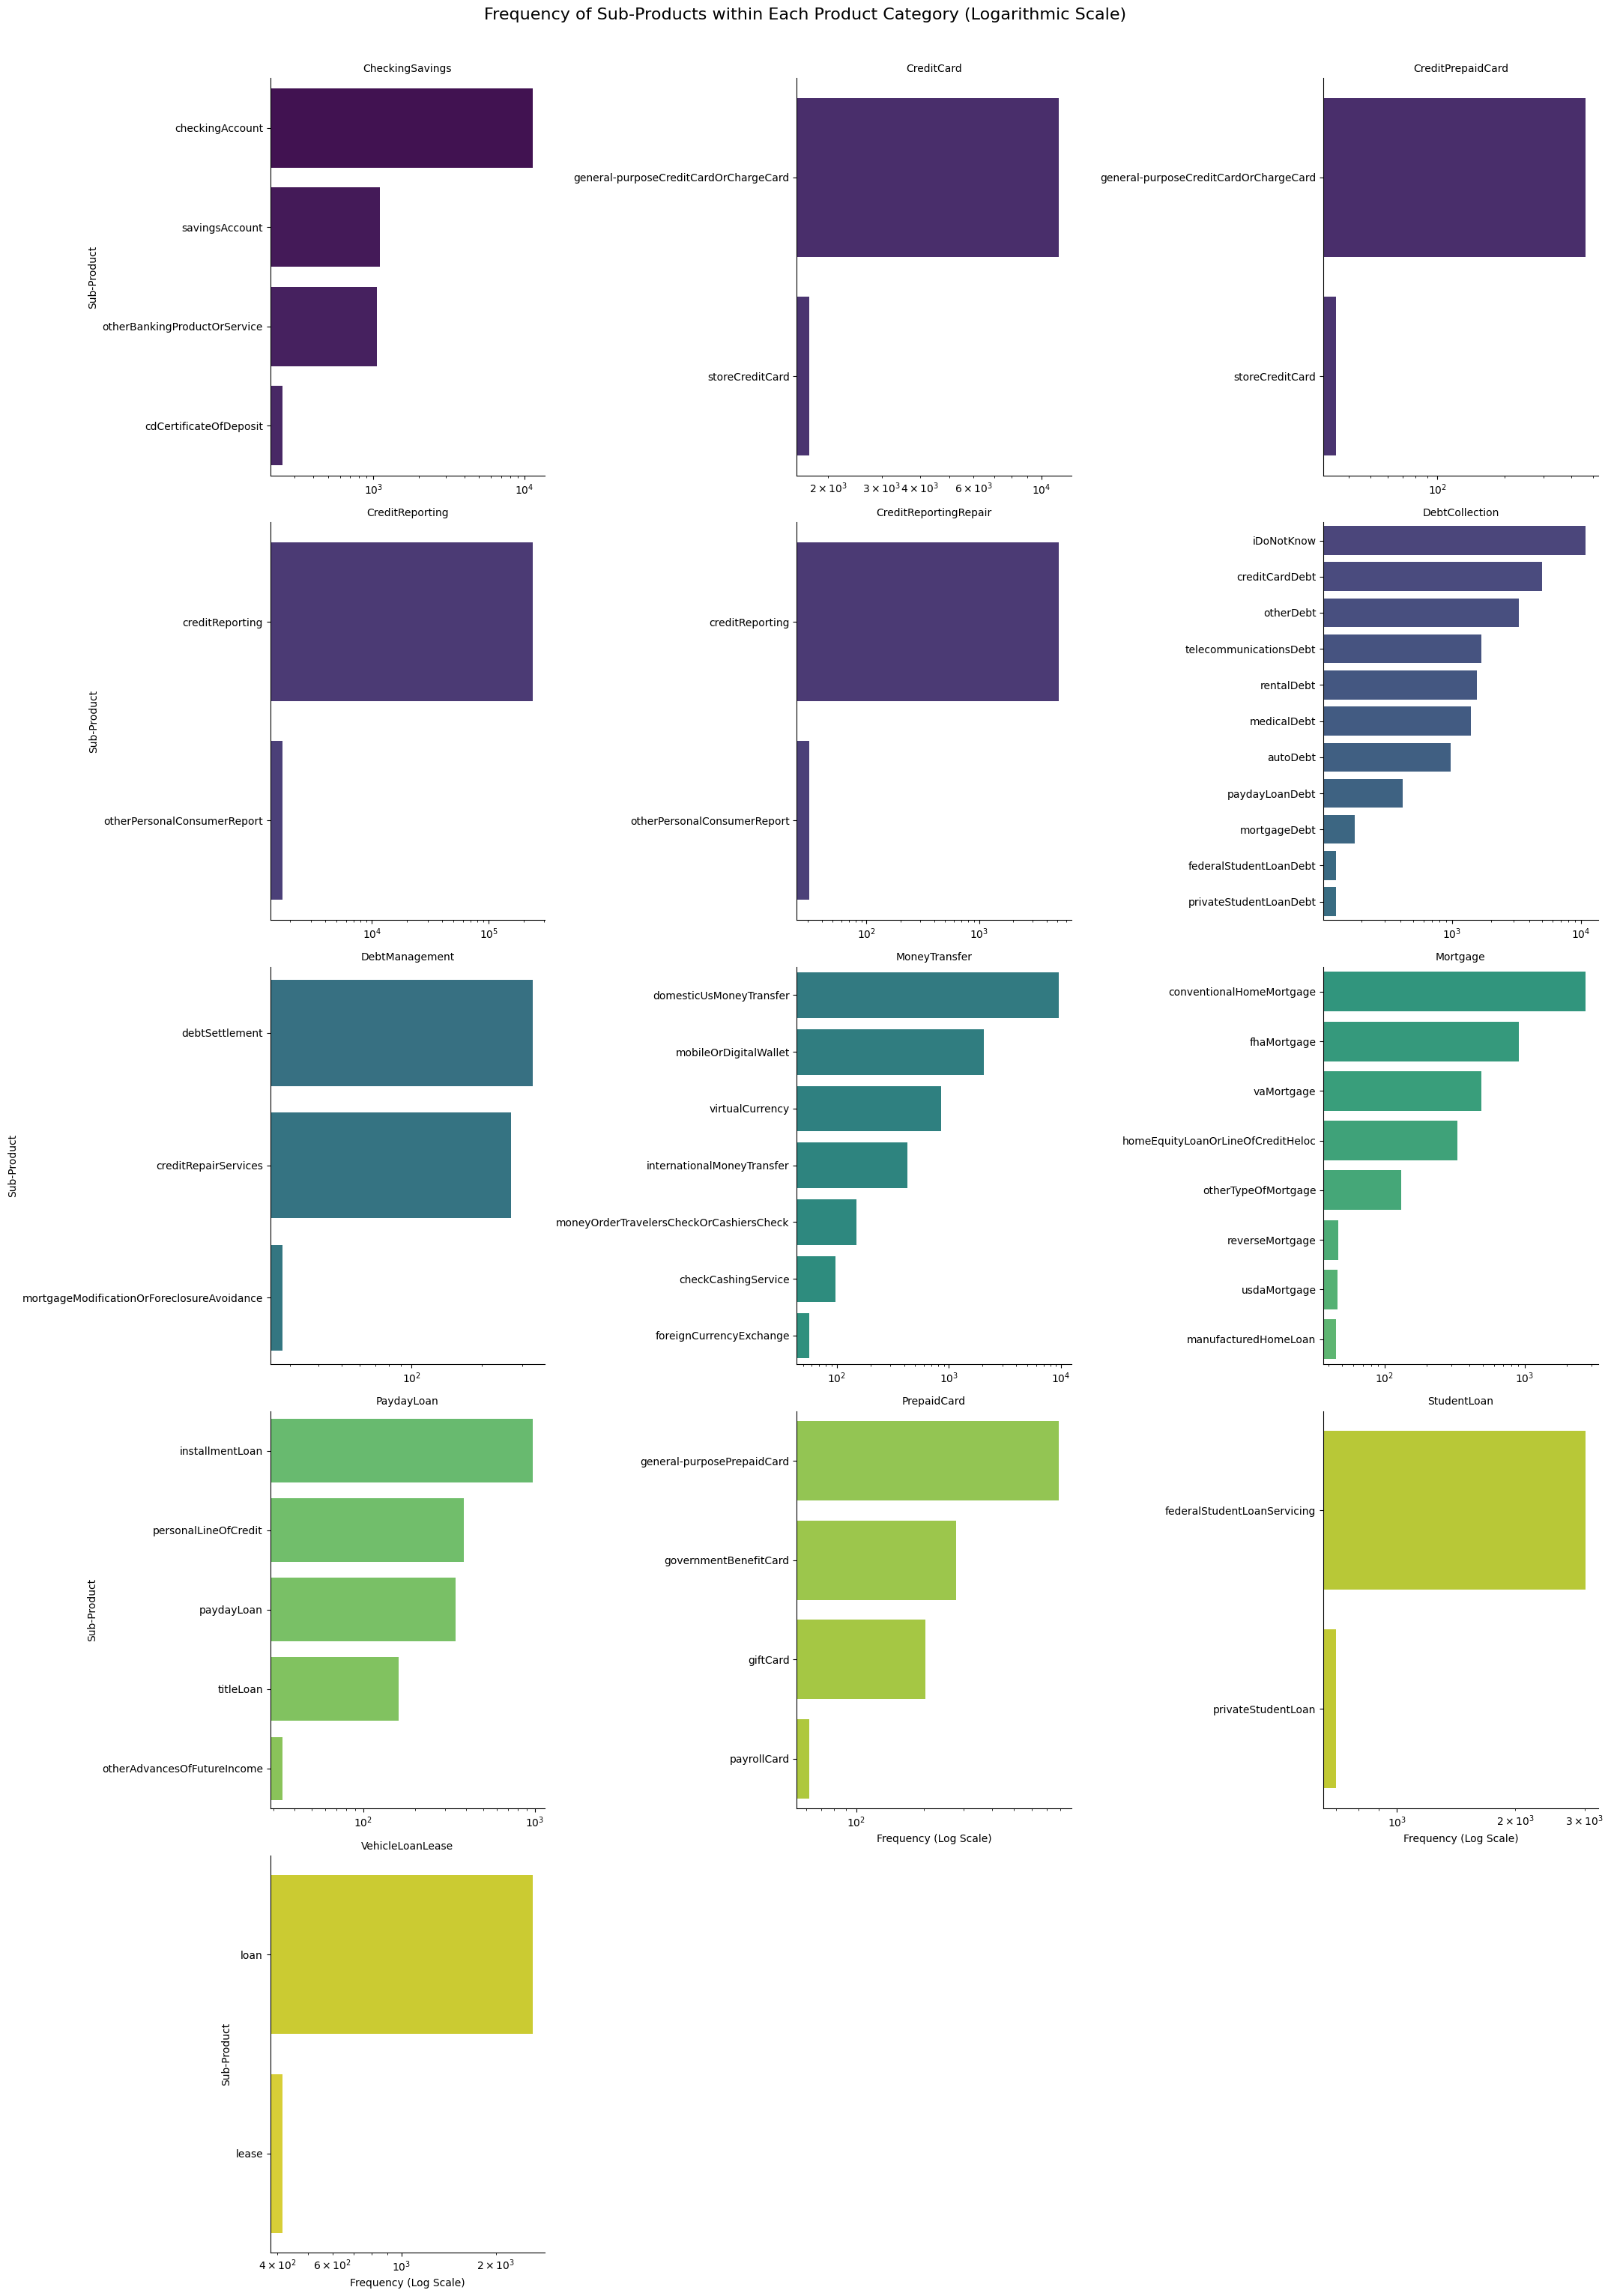

Faceted horizontal bar chart of sub-products with logarithmic x-axis generated, explicitly filtering for non-zero counts.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product-subproduct combination
product_subproduct_counts = uscon_df.groupby(['product', 'sub-product']).size().reset_index(name='count')

# Sort by count within each product for better visualization
product_subproduct_counts_sorted = product_subproduct_counts.sort_values(by=['product', 'count'], ascending=[True, False])

# Explicitly filter out sub-products with zero count, although groupby().size() should already handle this.
# This ensures that only sub-products with actual occurrences are plotted.
product_subproduct_counts_filtered = product_subproduct_counts_sorted[product_subproduct_counts_sorted['count'] > 0]

# Create the faceted horizontal bar chart with logarithmic x-axis
g = sns.catplot(data=product_subproduct_counts_filtered,
                x='count', # Frequency on x-axis
                y='sub-product', # Sub-product names on y-axis
                col='product',
                col_wrap=3, # Wrap columns after 3 plots
                kind='bar',
                height=6, # Adjusted height for horizontal bars
                aspect=1.2, # Adjusted aspect for horizontal bars
                sharex=False, # Allow each subplot to have its own x-axis scale
                sharey=False, # Crucial: Ensure each subplot has its own y-axis scale
                hue='sub-product', # Assign 'sub-product' to hue for color mapping
                palette='viridis',
                legend=False) # Set legend to False

# Apply logarithmic scale to the x-axis for each subplot
g.set(xscale="log")

# Set labels for the axes
g.set_axis_labels('Frequency (Log Scale)', 'Sub-Product')

# Set titles for each subplot
g.set_titles("{col_name}")

# Adjust layout to prevent overlapping titles/labels
g.tight_layout()

# Add a main title for the entire figure
plt.suptitle('Frequency of Sub-Products within Each Product Category (Logarithmic Scale)', y=1.02, fontsize=16)

plt.show()
print("Faceted horizontal bar chart of sub-products with logarithmic x-axis generated, explicitly filtering for non-zero counts.")

# Task
Perform a text analysis on the 'consumer_complaint_narrative' column of the `uscon_df` DataFrame by cleaning and tokenizing the text, and then generating horizontal bar plots for the top 10 most frequent stopwords, top 10 most frequent words (excluding stopwords), top 10 most frequent bi-grams, and top 10 most frequent tri-grams, finally summarizing the key findings.

## Preprocess text for word and n-gram analysis

### Subtask:
Clean the 'consumer_complaint_narrative' column by converting text to lowercase, removing punctuation, and tokenizing words. Also, download NLTK stopwords for later use.


**Reasoning**:
Now that the NLTK resources are ensured to be downloaded, I will define a text preprocessing function that converts text to lowercase, removes punctuation, and tokenizes the text. Then, I will apply this function to the 'consumer_complaint_narrative' column to create a new 'processed_narrative' column.



**Reasoning**:
The previous error indicated that the `punkt_tab` resource was not found, which is required by `nltk.tokenize.word_tokenize`. I will modify the NLTK download cell to explicitly download `punkt_tab` using a `try-except LookupError` block, similar to how `stopwords` and `punkt` are handled, to ensure all necessary resources are available before text preprocessing.



In [15]:
import nltk

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

print("NLTK 'stopwords', 'punkt', and 'punkt_tab' resources ensured to be downloaded.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


NLTK 'stopwords', 'punkt', and 'punkt_tab' resources ensured to be downloaded.


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**Reasoning**:
Now that all necessary NLTK resources, including `punkt_tab`, are confirmed to be downloaded, I will re-execute the code to define the `preprocess_text` function and apply it to the `consumer_complaint_narrative` column to create the `processed_narrative` column. This should now run without the `LookupError` previously encountered.



In [ ]:
import string
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize words
    tokens = word_tokenize(text)
    return tokens

uscon_df['processed_narrative'] = uscon_df['consumer_complaint_narrative'].apply(preprocess_text)
print("Created 'processed_narrative' column with preprocessed text tokens.")

Created 'processed_narrative' column with preprocessed text tokens.


**Reasoning**:
Now that the text has been preprocessed and tokenized, the next step in the text analysis is to identify and analyze the most frequent stopwords. To do this, I will first get the English stopwords from NLTK. Then, I will flatten the list of processed tokens, count the frequency of each stopword, and select the top 10 most frequent ones for visualization.



/tmp/ipython-input-3437992992.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


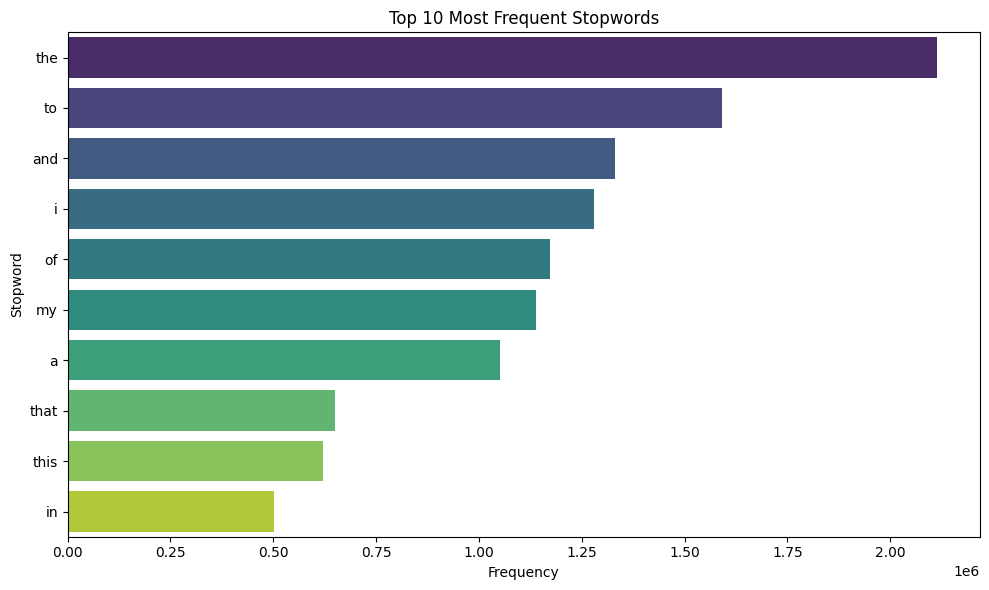

Horizontal bar chart of top 10 most frequent stopwords generated.


In [ ]:
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Flatten the list of all processed tokens
all_tokens = [token for sublist in uscon_df['processed_narrative'] for token in sublist]

# Filter out non-stopwords to find frequent stopwords
all_stopwords = [word for word in all_tokens if word in stop_words]

# Count the frequency of each stopword
stopword_counts = Counter(all_stopwords)

# Get the top 10 most frequent stopwords
top_10_stopwords = stopword_counts.most_common(10)

# Prepare data for plotting
words = [word for word, count in top_10_stopwords]
counts = [count for word, count in top_10_stopwords]

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Stopword')
plt.title('Top 10 Most Frequent Stopwords')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent stopwords generated.")

**Reasoning**:
The previous code generated a `FutureWarning` for `sns.barplot` regarding the `palette` argument. I will modify the existing `sns.barplot` call to explicitly set `hue=words` and `legend=False` to resolve this warning. Additionally, I will add a new section to identify and plot the top 10 most frequent words after removing stopwords from the preprocessed narrative.



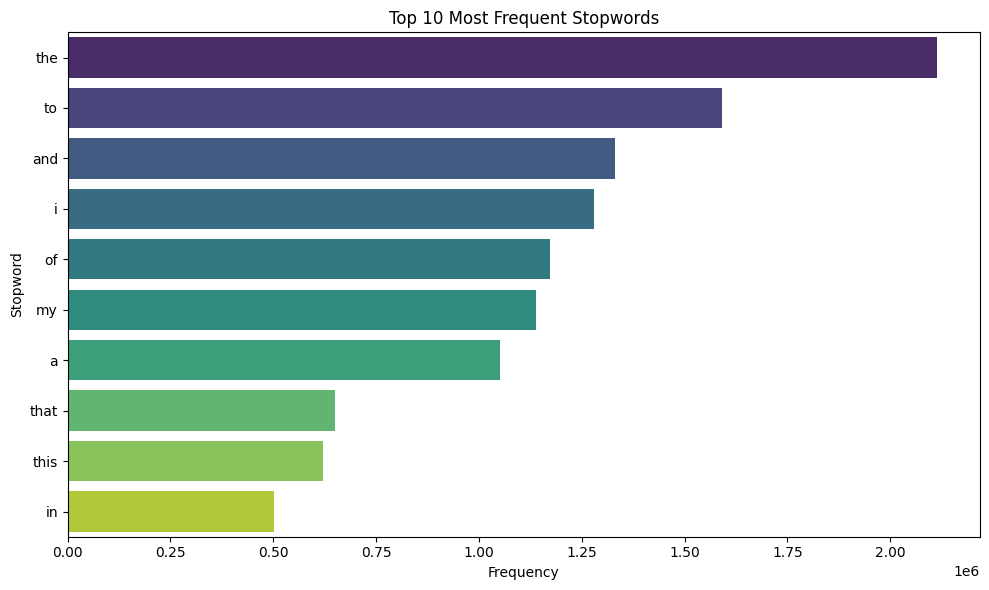

Horizontal bar chart of top 10 most frequent stopwords generated.


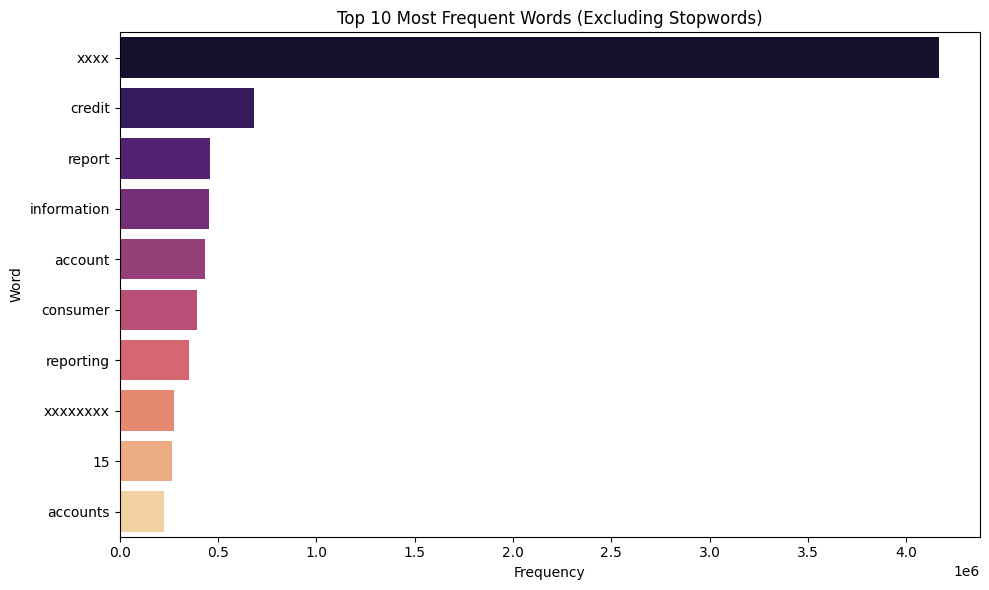

Horizontal bar chart of top 10 most frequent words (excluding stopwords) generated.


In [ ]:
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Flatten the list of all processed tokens
all_tokens = [token for sublist in uscon_df['processed_narrative'] for token in sublist]

# Filter out non-stopwords to find frequent stopwords
all_stopwords = [word for word in all_tokens if word in stop_words]

# Count the frequency of each stopword
stopword_counts = Counter(all_stopwords)

# Get the top 10 most frequent stopwords
top_10_stopwords = stopword_counts.most_common(10)

# Prepare data for plotting
words = [word for word, count in top_10_stopwords]
counts = [count for word, count in top_10_stopwords]

# Create the horizontal bar chart for stopwords
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, hue=words, palette='viridis', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Stopword')
plt.title('Top 10 Most Frequent Stopwords')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent stopwords generated.")


# Filter out stopwords to find frequent non-stopwords
filtered_words = [word for word in all_tokens if word not in stop_words and len(word) > 1] # Exclude single characters

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 10 most frequent words
top_10_words = word_counts.most_common(10)

# Prepare data for plotting
words_ns = [word for word, count in top_10_words]
counts_ns = [count for word, count in top_10_words]

# Create the horizontal bar chart for non-stopwords
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_ns, y=words_ns, hue=words_ns, palette='magma', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Most Frequent Words (Excluding Stopwords)')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent words (excluding stopwords) generated.")

**Reasoning**:
To analyze frequent word combinations, I will generate bi-grams and tri-grams from the `filtered_words` list, which contains words excluding stopwords. Then, I will count their frequencies and plot the top 10 for both bi-grams and tri-grams using horizontal bar charts to visualize these common sequences.



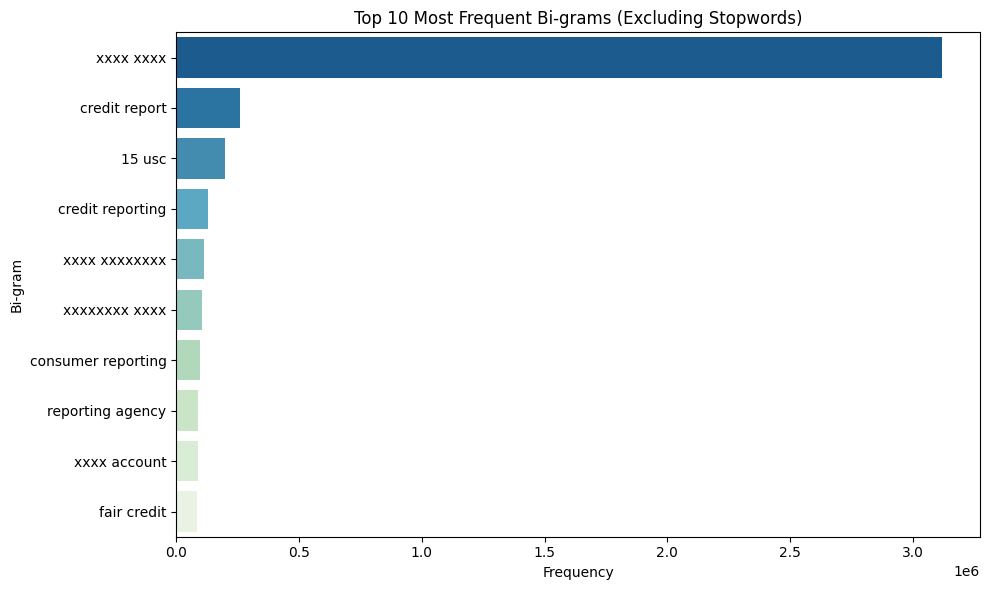

Horizontal bar chart of top 10 most frequent bi-grams generated.


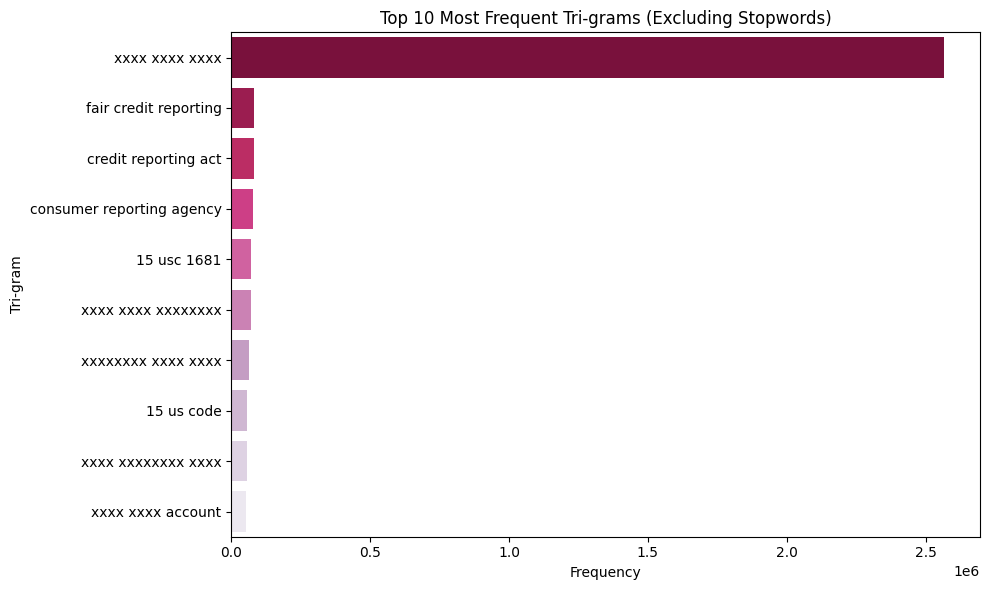

Horizontal bar chart of top 10 most frequent tri-grams generated.


In [ ]:
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Generate bi-grams from filtered words
bi_grams = list(ngrams(filtered_words, 2))

# Count the frequency of each bi-gram
bi_gram_counts = Counter(bi_grams)

# Get the top 10 most frequent bi-grams
top_10_bi_grams = bi_gram_counts.most_common(10)

# Prepare data for plotting
bi_words = [' '.join(gram) for gram, count in top_10_bi_grams]
bi_counts = [count for gram, count in top_10_bi_grams]

# Create the horizontal bar chart for bi-grams
plt.figure(figsize=(10, 6))
sns.barplot(x=bi_counts, y=bi_words, hue=bi_words, palette='GnBu_r', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.title('Top 10 Most Frequent Bi-grams (Excluding Stopwords)')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent bi-grams generated.")

# Generate tri-grams from filtered words
tri_grams = list(ngrams(filtered_words, 3))

# Count the frequency of each tri-gram
tri_gram_counts = Counter(tri_grams)

# Get the top 10 most frequent tri-grams
top_10_tri_grams = tri_gram_counts.most_common(10)

# Prepare data for plotting
tri_words = [' '.join(gram) for gram, count in top_10_tri_grams]
tri_counts = [count for gram, count in top_10_tri_grams]

# Create the horizontal bar chart for tri-grams
plt.figure(figsize=(10, 6))
sns.barplot(x=tri_counts, y=tri_words, hue=tri_words, palette='PuRd_r', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Tri-gram')
plt.title('Top 10 Most Frequent Tri-grams (Excluding Stopwords)')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent tri-grams generated.")

## Summary of Text Analysis Key Findings

### Stopwords Analysis
*   The most frequent stopwords like 'the', 'to', 'and', 'i', 'of', and 'my' were dominant, as expected. This confirms the initial preprocessing steps effectively identified and counted these common words.

### Word Frequency Analysis (Excluding Stopwords)
*   The term 'xxxx' was overwhelmingly the most frequent word. This likely represents redacted or anonymized information in the narratives, indicating its pervasive presence in the complaints.
*   Other high-frequency words such as 'credit', 'report', 'information', 'account', and 'consumer' directly relate to the nature of consumer complaints, especially those involving financial services and reporting agencies.

### Bi-gram and Tri-gram Analysis (Excluding Stopwords)
*   Bi-grams like 'xxxx xxxx', 'credit report', and 'credit reporting' highlight common phrases and concepts. The prominence of 'xxxx xxxx' further reinforces the presence of redacted data in common phrases.
*   Tri-grams such as 'xxxx xxxx xxxx', 'fair credit reporting', and 'credit reporting act' indicate specific legal or operational terms that frequently appear together in the narratives, offering insights into the common issues or references within the complaints.

## Summary:

### Data Analysis Key Findings

*   **Text Preprocessing:** The 'consumer\_complaint\_narrative' column was successfully cleaned by converting text to lowercase, removing punctuation, and tokenizing words. A new column, 'processed\_narrative', was created for the tokenized text.
*   **Most Frequent Stopwords:** As expected, common English stopwords such as 'the', 'to', 'and', 'i', 'of', and 'my' were found to be the most frequent.
*   **Most Frequent Words (Excluding Stopwords):** The term 'xxxx' was overwhelmingly the most frequent word, indicating widespread redaction or anonymization in the complaint narratives. Other top words included 'credit', 'report', 'information', 'account', and 'consumer', which are highly relevant to consumer complaints, particularly in the financial sector.
*   **Most Frequent Bi-grams (Excluding Stopwords):** Top bi-grams included 'xxxx xxxx', 'credit report', and 'credit reporting', further emphasizing the presence of redacted information and key phrases related to credit.
*   **Most Frequent Tri-grams (Excluding Stopwords):** Prominent tri-grams were 'xxxx xxxx xxxx', 'fair credit reporting', and 'credit reporting act', suggesting recurring legal or industry-specific terminology in the complaints.

### Insights or Next Steps

*   The pervasive presence of 'xxxx' as the most frequent term across words, bi-grams, and tri-grams highlights the need to understand its context. Future analysis could explore strategies to either interpret what 'xxxx' might represent or to filter it out if it doesn't contribute meaningfully to the core complaint sentiment.
*   The high frequency of terms like 'credit', 'report', 'account', and related n-grams ('credit report', 'fair credit reporting act') indicates that a significant portion of consumer complaints likely pertains to credit reporting, financial accounts, and associated regulations. This suggests a potential area for more focused, domain-specific text analysis, such as sentiment analysis or topic modeling on these particular themes.


## Create Word Cloud of Consumer Complaint Narratives

### Subtask:
Generate and display a word cloud from the processed consumer complaint narratives.

**Reasoning**:
To visually represent the most frequent words in the consumer complaint narratives, I will use the `WordCloud` library. I will first join the `filtered_words` (which are already preprocessed and stopwords removed) into a single string, and then generate the word cloud. `matplotlib` will be used to display the generated word cloud.

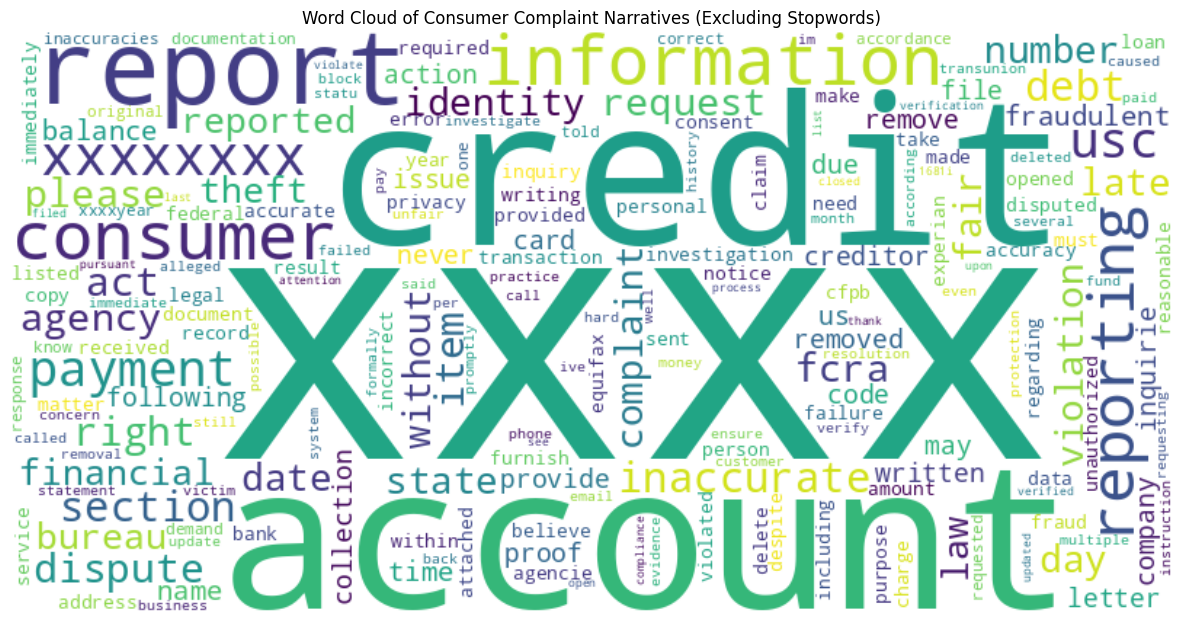

Word cloud generated from consumer complaint narratives.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure filtered_words is available; if not, re-run previous cells or define it.
# For this step, we assume filtered_words is available from previous execution.

# Join the filtered words into a single string
long_string = " ".join(filtered_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(long_string)

# Display the generated image:
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Consumer Complaint Narratives (Excluding Stopwords)')
plt.show()

print("Word cloud generated from consumer complaint narratives.")

<Axes: >

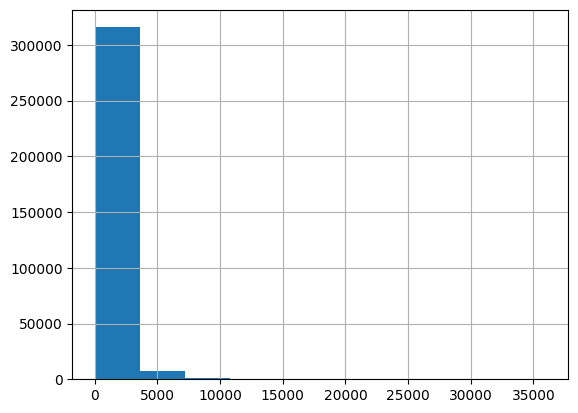

In [ ]:
uscon_df['consumer_complaint_narrative'].str.len().hist()

## Character level analysis

<Axes: >

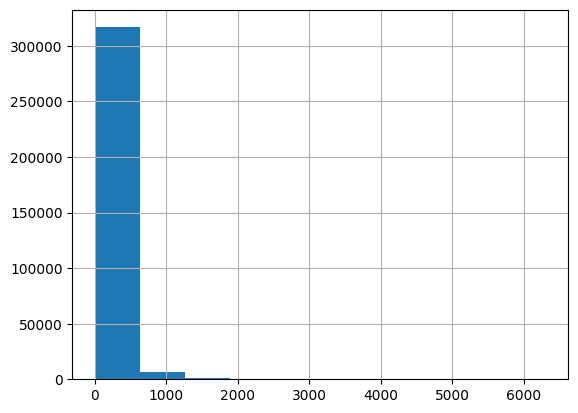

In [ ]:
uscon_df['consumer_complaint_narrative'].str.split().map(lambda x: len(x)).hist()
## Word level analysis

<Axes: >

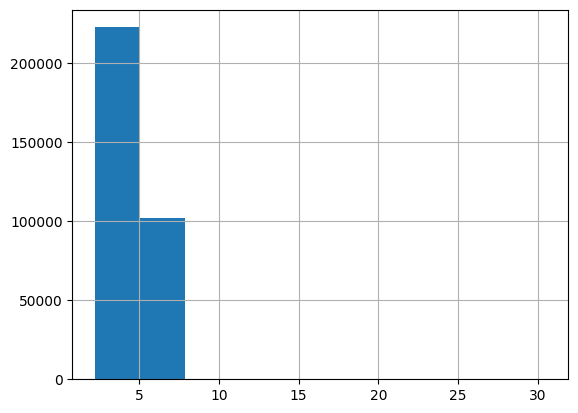

In [ ]:
## average word length in each sentence
import numpy as np

uscon_df['consumer_complaint_narrative'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

### EDA after data cleaning and pre-processing

In [7]:
uscon_df.head()

consumer_complaint_narrative  \
0  I was using Bread XXXX previously known as XXX...   
1  XXXX XXXX XXXX were presented by the XXXX hold...   
2  Complaint against NexBank This bank and its em...   
3  Chase Bank 9 month lock on a CD at 5 % equals ...   
4  Since XXXX of XX/XX/2024, Synchrony bank has b...   

                        hierarchical_label  
0  CheckingSavings::cdCertificateOfDeposit  
1  CheckingSavings::cdCertificateOfDeposit  
2  CheckingSavings::cdCertificateOfDeposit  
3  CheckingSavings::cdCertificateOfDeposit  
4  CheckingSavings::cdCertificateOfDeposit

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import re
from nltk.corpus import stopwords

# Pre-compiled regex patterns
REPLACE_BY_SPACE_RE = re.compile(r'[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile(r'[^0-9a-z #+_!<>*~$%^&()-=]')
NUMBERS_RE = re.compile(r'[0-9]+')
STOPWORDS = set(stopwords.words('english'))

lstOfJunkCharacters = [
    '#', 'xxxx', 'xx xx xxxx', 'xx xx', 'xx', '$', '%',
    'xxxx xxxx', 'xx xx', 'xxxx and', 'xx xxxx', 'on xxxx', '.'
]

def clean_text(text: str) -> str:
    # Lowercase
    text = text.lower()

    # Replace selected symbols with space
    text = REPLACE_BY_SPACE_RE.sub(' ', text)

    # Remove bad symbols
    text = BAD_SYMBOLS_RE.sub('', text)

    # Remove numbers
    text = NUMBERS_RE.sub(' ', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)

    # Remove junk patterns
    for junk in lstOfJunkCharacters:
        text = text.replace(junk, ' ')

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text



In [13]:
df = uscon_df.copy()

In [14]:
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(clean_text)

In [17]:
import string
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize words
    tokens = word_tokenize(text)
    return tokens

df['processed_narrative'] = df['consumer_complaint_narrative'].apply(preprocess_text)
print("Created 'processed_narrative' column with preprocessed text tokens.")

Created 'processed_narrative' column with preprocessed text tokens.


/tmp/ipython-input-2427346133.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


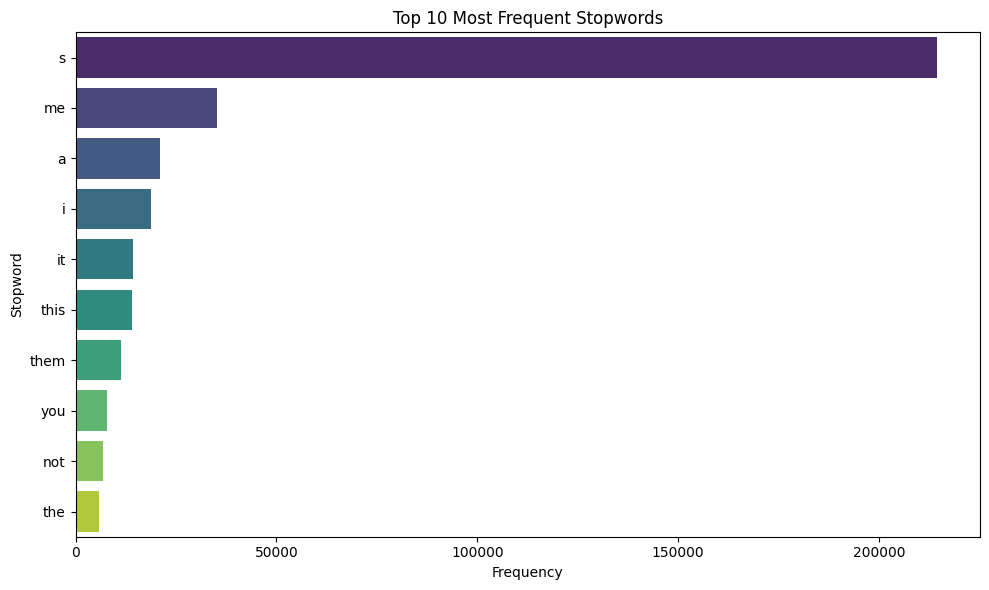

Horizontal bar chart of top 10 most frequent stopwords generated.


In [18]:

from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Flatten the list of all processed tokens
all_tokens = [token for sublist in df['processed_narrative'] for token in sublist]

# Filter out non-stopwords to find frequent stopwords
all_stopwords = [word for word in all_tokens if word in stop_words]

# Count the frequency of each stopword
stopword_counts = Counter(all_stopwords)

# Get the top 10 most frequent stopwords
top_10_stopwords = stopword_counts.most_common(10)

# Prepare data for plotting
words = [word for word, count in top_10_stopwords]
counts = [count for word, count in top_10_stopwords]

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Stopword')
plt.title('Top 10 Most Frequent Stopwords')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent stopwords generated.")

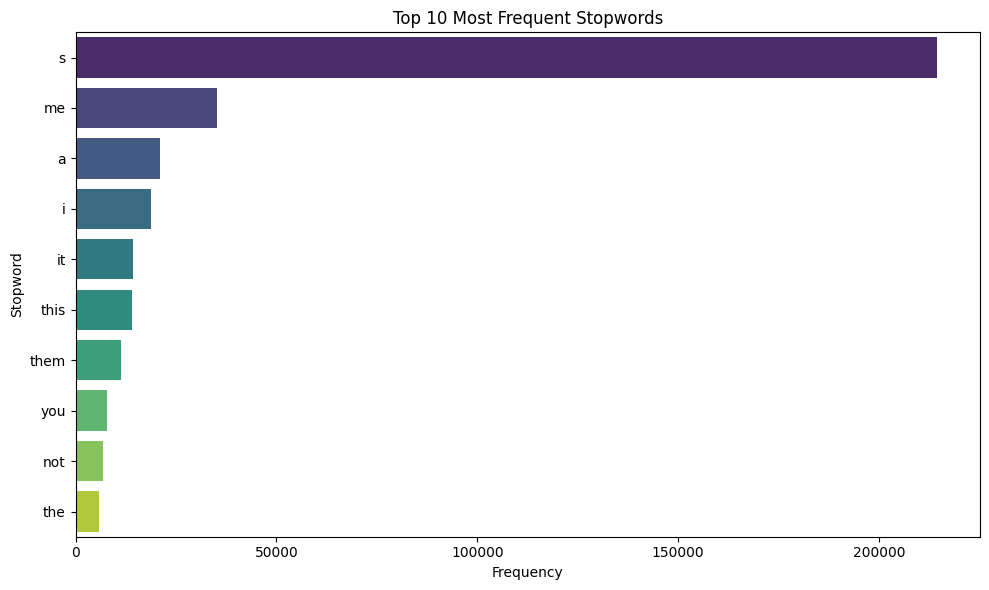

Horizontal bar chart of top 10 most frequent stopwords generated.


In [20]:
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Flatten the list of all processed tokens
all_tokens = [token for sublist in df['processed_narrative'] for token in sublist]

# Filter out non-stopwords to find frequent stopwords
all_stopwords = [word for word in all_tokens if word in stop_words]

# Count the frequency of each stopword
stopword_counts = Counter(all_stopwords)

# Get the top 10 most frequent stopwords
top_10_stopwords = stopword_counts.most_common(10)

# Prepare data for plotting
words = [word for word, count in top_10_stopwords]
counts = [count for word, count in top_10_stopwords]

# Create the horizontal bar chart for stopwords
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, hue=words, palette='viridis', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Stopword')
plt.title('Top 10 Most Frequent Stopwords')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent stopwords generated.")

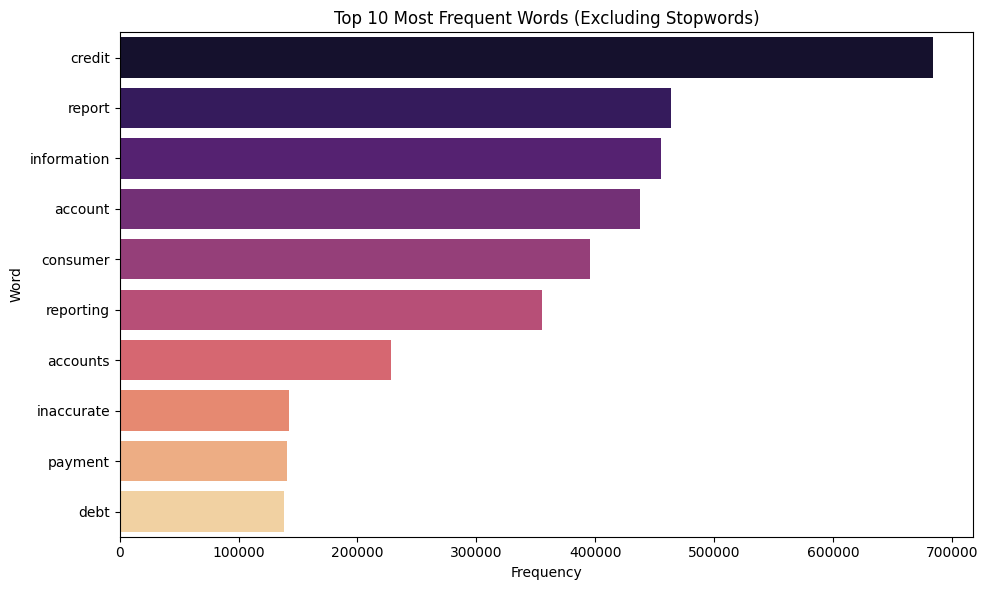

Horizontal bar chart of top 10 most frequent words (excluding stopwords) generated.


In [21]:

# Filter out stopwords to find frequent non-stopwords
filtered_words = [word for word in all_tokens if word not in stop_words and len(word) > 1] # Exclude single characters

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 10 most frequent words
top_10_words = word_counts.most_common(10)

# Prepare data for plotting
words_ns = [word for word, count in top_10_words]
counts_ns = [count for word, count in top_10_words]

# Create the horizontal bar chart for non-stopwords
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_ns, y=words_ns, hue=words_ns, palette='magma', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Most Frequent Words (Excluding Stopwords)')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent words (excluding stopwords) generated.")




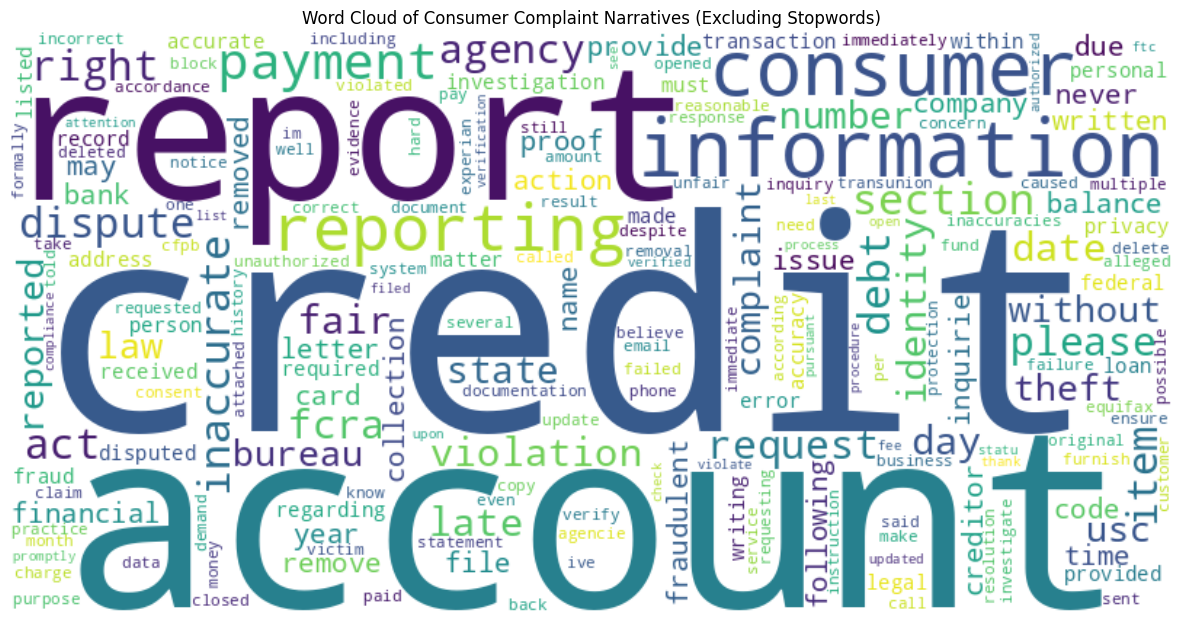

Word cloud generated from consumer complaint narratives.


In [22]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure filtered_words is available; if not, re-run previous cells or define it.
# For this step, we assume filtered_words is available from previous execution.

# Join the filtered words into a single string
long_string = " ".join(filtered_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(long_string)

# Display the generated image:
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Consumer Complaint Narratives (Excluding Stopwords)')
plt.show()

print("Word cloud generated from consumer complaint narratives.")





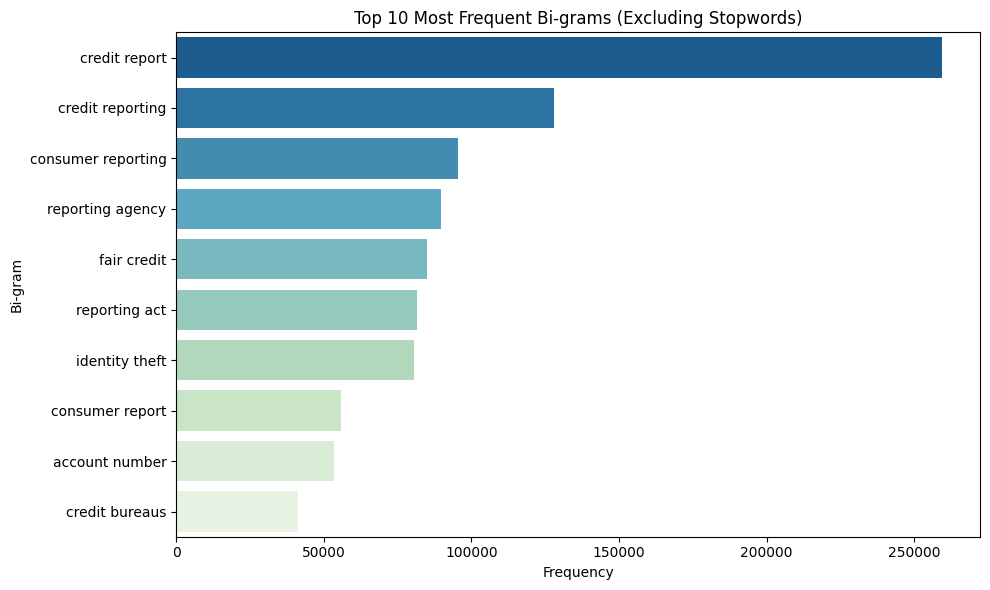

Horizontal bar chart of top 10 most frequent bi-grams generated.


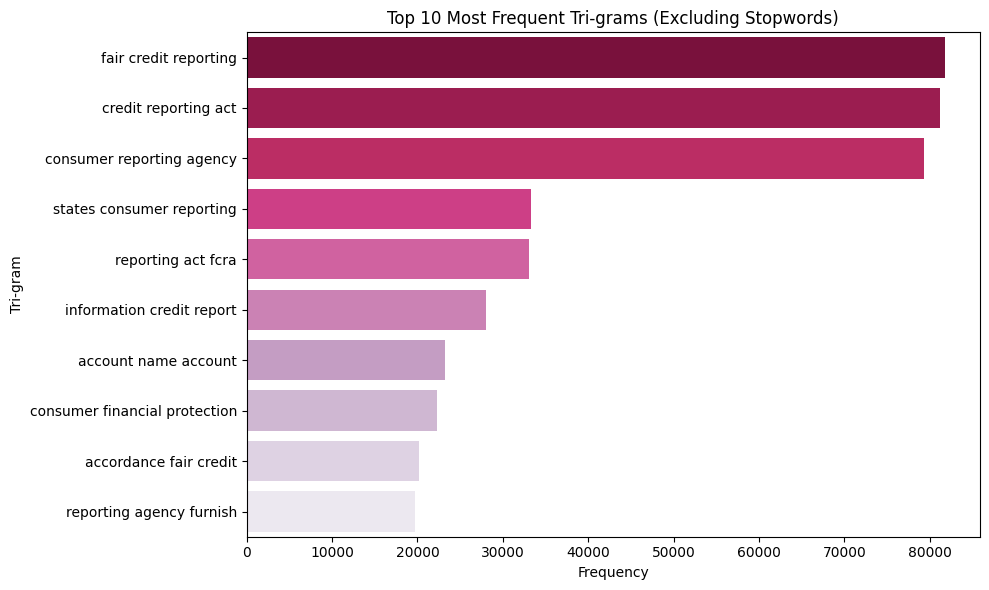

Horizontal bar chart of top 10 most frequent tri-grams generated.


In [23]:

from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Generate bi-grams from filtered words
bi_grams = list(ngrams(filtered_words, 2))

# Count the frequency of each bi-gram
bi_gram_counts = Counter(bi_grams)

# Get the top 10 most frequent bi-grams
top_10_bi_grams = bi_gram_counts.most_common(10)

# Prepare data for plotting
bi_words = [' '.join(gram) for gram, count in top_10_bi_grams]
bi_counts = [count for gram, count in top_10_bi_grams]

# Create the horizontal bar chart for bi-grams
plt.figure(figsize=(10, 6))
sns.barplot(x=bi_counts, y=bi_words, hue=bi_words, palette='GnBu_r', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.title('Top 10 Most Frequent Bi-grams (Excluding Stopwords)')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent bi-grams generated.")

# Generate tri-grams from filtered words
tri_grams = list(ngrams(filtered_words, 3))

# Count the frequency of each tri-gram
tri_gram_counts = Counter(tri_grams)

# Get the top 10 most frequent tri-grams
top_10_tri_grams = tri_gram_counts.most_common(10)

# Prepare data for plotting
tri_words = [' '.join(gram) for gram, count in top_10_tri_grams]
tri_counts = [count for gram, count in top_10_tri_grams]

# Create the horizontal bar chart for tri-grams
plt.figure(figsize=(10, 6))
sns.barplot(x=tri_counts, y=tri_words, hue=tri_words, palette='PuRd_r', legend=False)
plt.xlabel('Frequency')
plt.ylabel('Tri-gram')
plt.title('Top 10 Most Frequent Tri-grams (Excluding Stopwords)')
plt.tight_layout()
plt.show()

print("Horizontal bar chart of top 10 most frequent tri-grams generated.")


<Axes: >

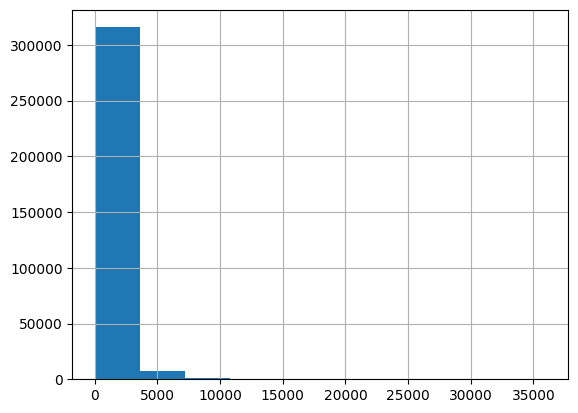

In [24]:
uscon_df['consumer_complaint_narrative'].str.len().hist()

## Character level analysis

<Axes: >

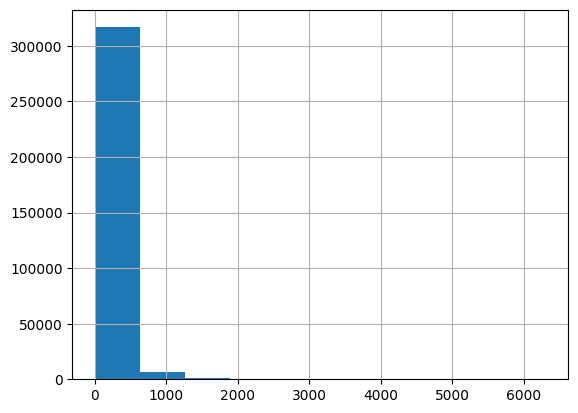

In [25]:

uscon_df['consumer_complaint_narrative'].str.split().map(lambda x: len(x)).hist()
## Word level analysis

<Axes: >

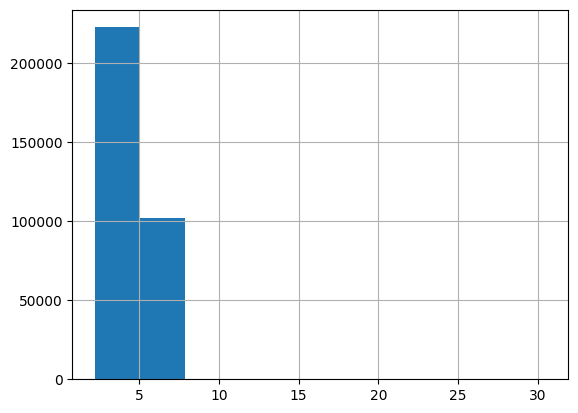

In [26]:
## average word length in each sentence
import numpy as np

uscon_df['consumer_complaint_narrative'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

### EDA after creating the balacned dataset using NLP Data Augentation approach

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/GitHub_ToChair/FilteredDataSetForExp_002.csv

In [43]:
import pandas as pd

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df_balanced = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/GitHub_ToChair/FilteredDataSetForExp_002.csv')

In [46]:
df_balanced.head()

consumer_complaint_narrative  \
0  I am filing a complaint with the CFPB regardin...   
1  I was charged overdraft fees because of late p...   
2  XX/XX/2024 they withdrew XXXX out my account.....   
3  Here 's a revised version of your letter to Al...   
4  Attn : XXXX Bank Fraud I was Scam. XX/XX/XXXX ...   

                 hierarchical_label  
0  CheckingSavings::checkingAccount  
1  CheckingSavings::checkingAccount  
2  CheckingSavings::checkingAccount  
3  CheckingSavings::checkingAccount  
4  CheckingSavings::checkingAccount

In [47]:
df_balanced.shape

(108000, 2)

In [55]:
hierarchical_label_counts = df_balanced['hierarchical_label'].value_counts()
display(hierarchical_label_counts)

hierarchical_label
CheckingSavings::checkingAccount                              2000
CreditCard::general-purposeCreditCardOrChargeCard             2000
CreditReporting::creditReporting                              2000
CreditReportingRepair::creditReporting                        2000
DebtCollection::creditCardDebt                                2000
DebtCollection::iDoNotKnow                                    2000
DebtCollection::otherDebt                                     2000
MoneyTransfer::domesticUsMoneyTransfer                        2000
MoneyTransfer::mobileOrDigitalWallet                          2000
Mortgage::conventionalHomeMortgage                            2000
StudentLoan::federalStudentLoanServicing                      2000
VehicleLoanLease::loan                                        2000
CheckingSavings::cdCertificateOfDeposit                       2000
CheckingSavings::otherBankingProductOrService                 2000
CheckingSavings::savingsAccount                               2000
CreditCard::storeCreditCard                                   2000
CreditPrepaidCard::general-purposeCreditCardOrChargeCard      2000
CreditPrepaidCard::storeCreditCard                            2000
CreditReporting::otherPersonalConsumerReport                  2000
CreditReportingRepair::otherPersonalConsumerReport            2000
DebtCollection::autoDebt                                      2000
DebtCollection::federalStudentLoanDebt                        2000
DebtCollection::medicalDebt                                   2000
DebtCollection::mortgageDebt                                  2000
DebtCollection::paydayLoanDebt                                2000
DebtCollection::privateStudentLoanDebt                        2000
DebtCollection::rentalDebt                                    2000
DebtCollection::telecommunicationsDebt                        2000
DebtManagement::creditRepairServices                          2000
DebtManagement::debtSettlement                                2000
DebtManagement::mortgageModificationOrForeclosureAvoidance    2000
MoneyTransfer::checkCashingService                            2000
MoneyTransfer::foreignCurrencyExchange                        2000
MoneyTransfer::internationalMoneyTransfer                     2000
MoneyTransfer::moneyOrderTravelersCheckOrCashiersCheck        2000
MoneyTransfer::virtualCurrency                                2000
Mortgage::fhaMortgage                                         2000
Mortgage::homeEquityLoanOrLineOfCreditHeloc                   2000
Mortgage::manufacturedHomeLoan                                2000
Mortgage::otherTypeOfMortgage                                 2000
Mortgage::reverseMortgage                                     2000
Mortgage::usdaMortgage                                        2000
Mortgage::vaMortgage                                          2000
PaydayLoan::installmentLoan                                   2000
PaydayLoan::otherAdvancesOfFutureIncome                       2000
PaydayLoan::paydayLoan                                        2000
PaydayLoan::personalLineOfCredit                              2000
PaydayLoan::titleLoan                                         2000
PrepaidCard::general-purposePrepaidCard                       2000
PrepaidCard::giftCard                                         2000
PrepaidCard::governmentBenefitCard                            2000
PrepaidCard::payrollCard                                      2000
StudentLoan::privateStudentLoan                               2000
VehicleLoanLease::lease                                       2000
Name: count, dtype: int64

/tmp/ipython-input-2035239031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prosubpro_counts.index, y=prosubpro_counts.values, palette='viridis')


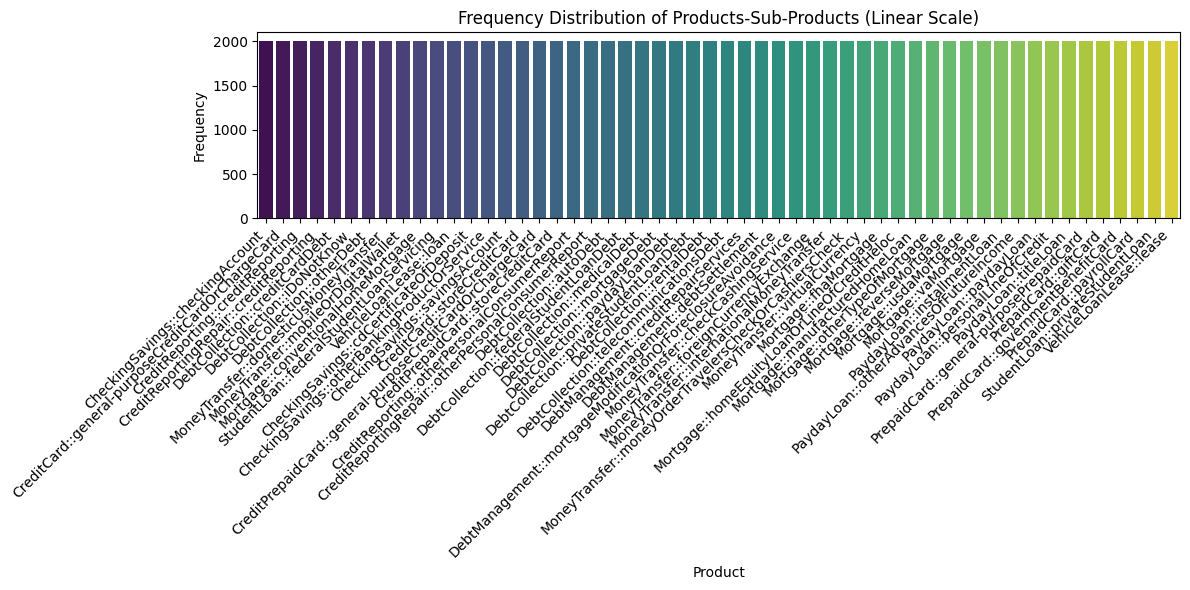

Bar chart showing the frequency distribution of Products-Sub-Products generated.


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency of each product
prosubpro_counts = df_balanced['hierarchical_label'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=prosubpro_counts.index, y=prosubpro_counts.values, palette='viridis')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Products-Sub-Products (Linear Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart showing the frequency distribution of Products-Sub-Products generated.")